## <CENTER> Innomatics Research Labs </CENTER>
### <CENTER>  Data Analysis Project 1 </CENTER>
#### <CENTER> Internship 2022 </CENTER>

Dataset link : https://drive.google.com/file/d/1mV_ifvzzrlPWgdSzrwW5ZK-aF3S9tydZ/view

Dataset Description:-

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [3]:
# First Five Records
df.head(5)

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
# Found the first column is repeating so decided to drop
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [5]:
#shape of the data
df.shape

(3998, 38)

In [6]:
# Number of Unique Levels
df.nunique()

ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
conscienti

In [7]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

## Found DOL column is in object so need to be converted in datetime format

In [8]:
df['DOL'].replace('present','22-08-2022 00:00',inplace=True)

In [9]:
#converting into datetime format
df['DOL'] = pd.to_datetime(df['DOL'])

In [10]:
#checking the format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [11]:
# checking for Missing Value
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

## No Missing value in the dataset

In [12]:
# Data Types
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [13]:
# Summaryy of Data
df.describe().T

count           mean            std         min  \
ID                     3998.0  663794.540520  363218.245829  11244.0000   
Salary                 3998.0  307699.849925  212737.499957  35000.0000   
10percentage           3998.0      77.925443       9.850162     43.0000   
12graduation           3998.0    2008.087544       1.653599   1995.0000   
12percentage           3998.0      74.466366      10.999933     40.0000   
CollegeID              3998.0    5156.851426    4802.261482      2.0000   
CollegeTier            3998.0       1.925713       0.262270      1.0000   
collegeGPA             3998.0      71.486171       8.167338      6.4500   
CollegeCityID          3998.0    5156.851426    4802.261482      2.0000   
CollegeCityTier        3998.0       0.300400       0.458489      0.0000   
GraduationYear         3998.0    2012.105803      31.857271      0.0000   
English                3998.0     501.649075     104.940021    180.0000   
Logical                3998.0     501.598799      86.783297    195.0000   
Quant                  3998.0     513.378189     122.302332    120.0000   
Domain                 3998.0       0.510490       0.468671     -1.0000   
ComputerProgramming    3998.0     353.102801     205.355519     -1.0000   
ElectronicsAndSemicon  3998.0      95.328414     158.241218     -1.0000   
ComputerScience        3998.0      90.742371     175.273083     -1.0000   
MechanicalEngg         3998.0      22.974737      98.123311     -1.0000   
ElectricalEngg         3998.0      16.478739      87.585634     -1.0000   
TelecomEngg            3998.0      31.851176     104.852845     -1.0000   
CivilEngg              3998.0       2.683842      36.658505     -1.0000   
conscientiousness      3998.0      -0.037831       1.028666     -4.1267   
agreeableness          3998.0       0.146496       0.941782     -5.7816   
extraversion           3998.0       0.002763       0.951471     -4.6009   
nueroticism            3998.0      -0.169033       1.007580     -2.6430   
openess_to_experience  3998.0      -0.138110       1.008075     -7.3757   

                                 25%            50%            75%  \
ID                     334284.250000  639600.000000  990480.000000   
Salary                 180000.000000  300000.000000  370000.000000   
10percentage               71.680000      79.150000      85.670000   
12graduation             2007.000000    2008.000000    2009.000000   
12percentage               66.000000      74.400000      82.600000   
CollegeID                 494.000000    3879.000000    8818.000000   
CollegeTier                 2.000000       2.000000       2.000000   
collegeGPA                 66.407500      71.720000      76.327500   
CollegeCityID             494.000000    3879.000000    8818.000000   
CollegeCityTier             0.000000       0.000000       1.000000   
GraduationYear           2012.000000    2013.000000    2014.000000   
English                   425.000000     500.000000     570.000000   
Logical                   445.000000     505.000000     565.000000   
Quant                     430.000000     515.000000     595.000000   
Domain                      0.342315       0.622643       0.842248   
ComputerProgramming       295.000000     415.000000     495.000000   
ElectronicsAndSemicon      -1.000000      -1.000000     233.000000   
ComputerScience            -1.000000      -1.000000      -1.000000   
MechanicalEngg             -1.000000      -1.000000      -1.000000   
ElectricalEngg             -1.000000      -1.000000      -1.000000   
TelecomEngg                -1.000000      -1.000000      -1.000000   
CivilEngg                  -1.000000      -1.000000      -1.000000   
conscientiousness          -0.713525       0.046400       0.702700   
agreeableness              -0.287100       0.212400       0.812800   
extraversion               -0.604800       0.091400       0.672000   
nueroticism                -0.868200      -0.234400       0.526200   
openess_to_experience      -0.669

## VISUALISATION

In [14]:
srt=df.sort_values(by=['DOJ'])

In [15]:
srt = srt.set_index('DOJ')
srt.index

DatetimeIndex(['1991-06-01', '2004-08-01', '2006-01-01', '2007-02-01',
               '2007-06-01', '2007-07-01', '2007-09-01', '2008-11-01',
               '2009-06-01', '2009-06-01',
               ...
               '2015-06-01', '2015-06-01', '2015-07-01', '2015-07-01',
               '2015-07-01', '2015-08-01', '2015-08-01', '2015-08-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='DOJ', length=3998, freq=None)

In [16]:
srt.index.drop_duplicates(keep='first')

DatetimeIndex(['1991-06-01', '2004-08-01', '2006-01-01', '2007-02-01',
               '2007-06-01', '2007-07-01', '2007-09-01', '2008-11-01',
               '2009-06-01', '2009-09-01', '2009-11-01', '2010-01-01',
               '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
               '2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01',
               '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01',
               '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',
               '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01',
               '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01',
               '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
               '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01',
      

In [17]:
srt.dropna
srt.shape

(3998, 37)

In [18]:
srt.head()

ID  Salary        DOL                      Designation  \
DOJ                                                                      
1991-06-01  611964  615000 2022-08-22  quality assurance test engineer   
2004-08-01  220601  180000 2005-03-01                  system engineer   
2006-01-01  958809  350000 2022-08-22                  general manager   
2007-02-01  332810   65000 2008-03-01                       programmer   
2007-06-01  480729  120000 2009-06-01                software engineer   

              JobCity Gender        DOB  10percentage         10board  \
DOJ                                                                     
1991-06-01      Noida      f 1991-06-18         71.00     state board   
2004-08-01    Gurgaon      f 1986-09-13         86.40               0   
2006-01-01     Jaipur      m 1994-02-12         83.40            cbse   
2007-02-01  Hyderabad      f 1985-05-15         65.67               0   
2007-06-01  Hyderabad      m 1986-06-18         83.50  ap state board   

            12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
DOJ                       ...                                                   
1991-06-01          2008  ...               -1             -1              -1   
2004-08-01          2004  ...               -1             -1              -1   
2006-01-01          2010  ...               -1             -1              -1   
2007-02-01          2002  ...               -1             -1              -1   
2007-06-01          2003  ...               -1             -1              -1   

            TelecomEngg CivilEngg conscientiousness  agreeableness  \
DOJ                                                                  
1991-06-01           -1        -1           -1.8825        -2.7846   
2004-08-01           -1        -1           -1.1901         1.1248   
2006-01-01           -1        -1           -1.0208        -1.1196   
2007-02-01           -1        -1            0.8192         0.2668   
2007-06-01           -1        -1           -1.4992        -0.7863   

            extraversion  nueroticism openess_to_experience  
DOJ                                                          
1991-06-01       -0.1437      0.90660               -1.0524  
2004-08-01        0.3817     -0.76030                0.6603  
2006-01-01       -1.9881     -0.23440               -2.7769  
2007-02-01       -0.5980      0.53233               -0.4455  
2007-06-01       -2.0131      0.41480               -0.6035  

[5 rows x 37 columns]

<AxesSubplot:xlabel='DOJ'>

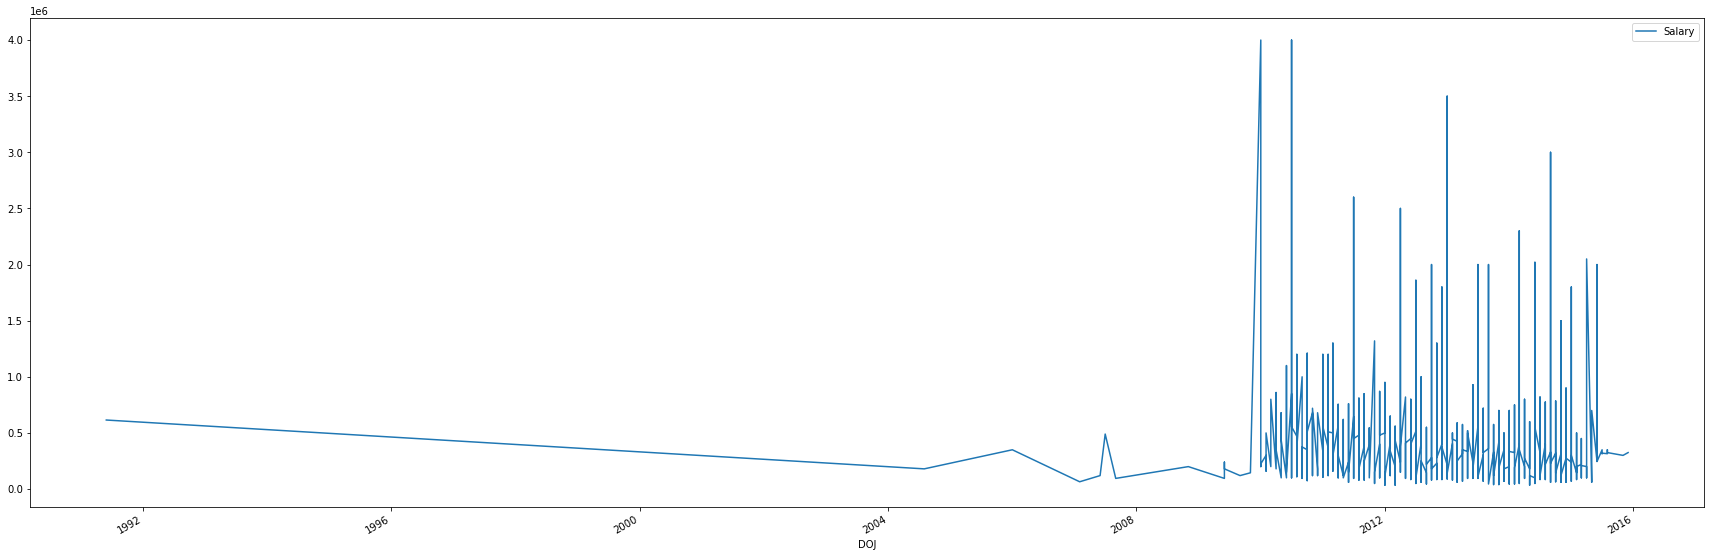

In [19]:
srt.plot(y="Salary",figsize=(30,10))

# From above graph we can see how salary varies over a time interval of 4 years.

<AxesSubplot:xlabel='DOJ'>

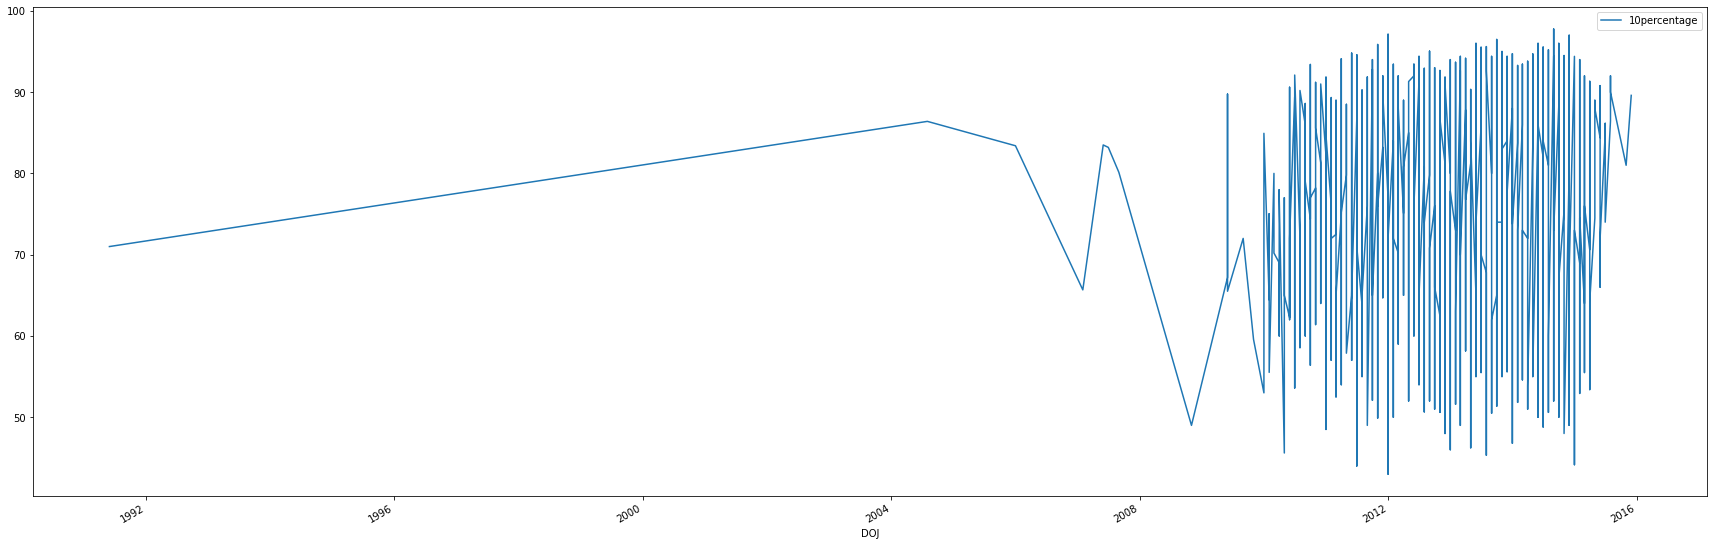

In [20]:
srt.plot(y="10percentage",figsize=(30,10))

<AxesSubplot:xlabel='DOJ'>

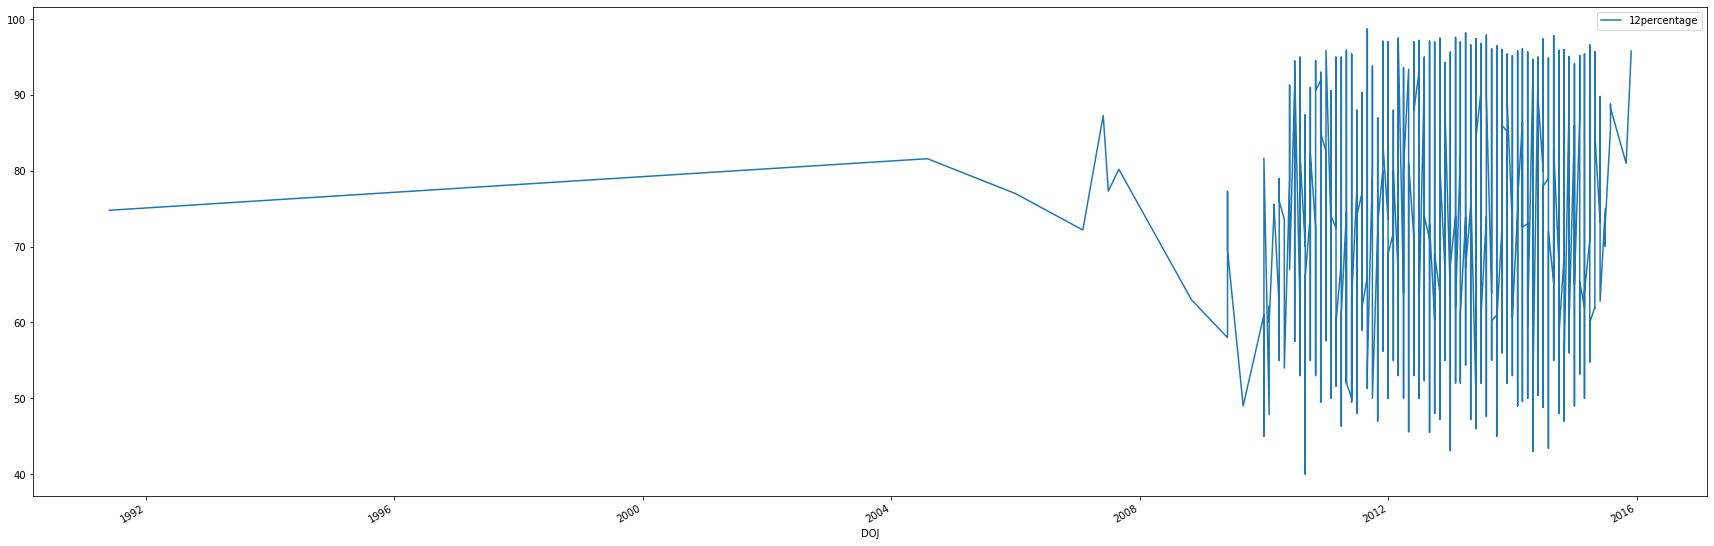

In [21]:
srt.plot(y="12percentage",figsize=(30,10))

<AxesSubplot:xlabel='DOJ'>

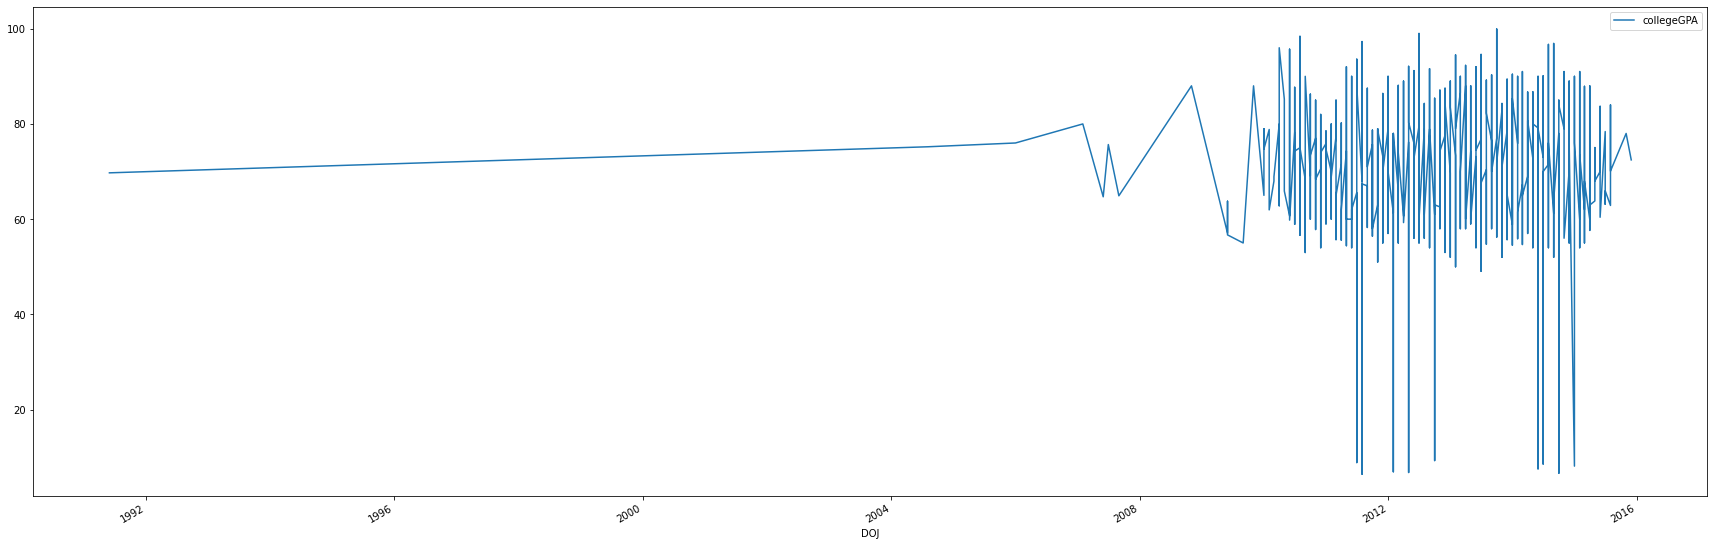

In [22]:
srt.plot(y="collegeGPA",figsize=(30,10))

# From above graph we can infer how percentageof 10,12 and college student varies over a interval of 4 years.

In [23]:
# bpc=['Salary','10percentage', '12graduation', '12percentage',
#        'CollegeID', 'CollegeTier', 'collegeGPA',
#        'CollegeCityID', 'CollegeCityTier', 'GraduationYear',
#        'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
#        'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
#        'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
#        'agreeableness', 'extraversion', 'nueroticism',
#        'openess_to_experience']
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()

# for column in bpc:
#     plt.figure()
#     df.boxplot([column])

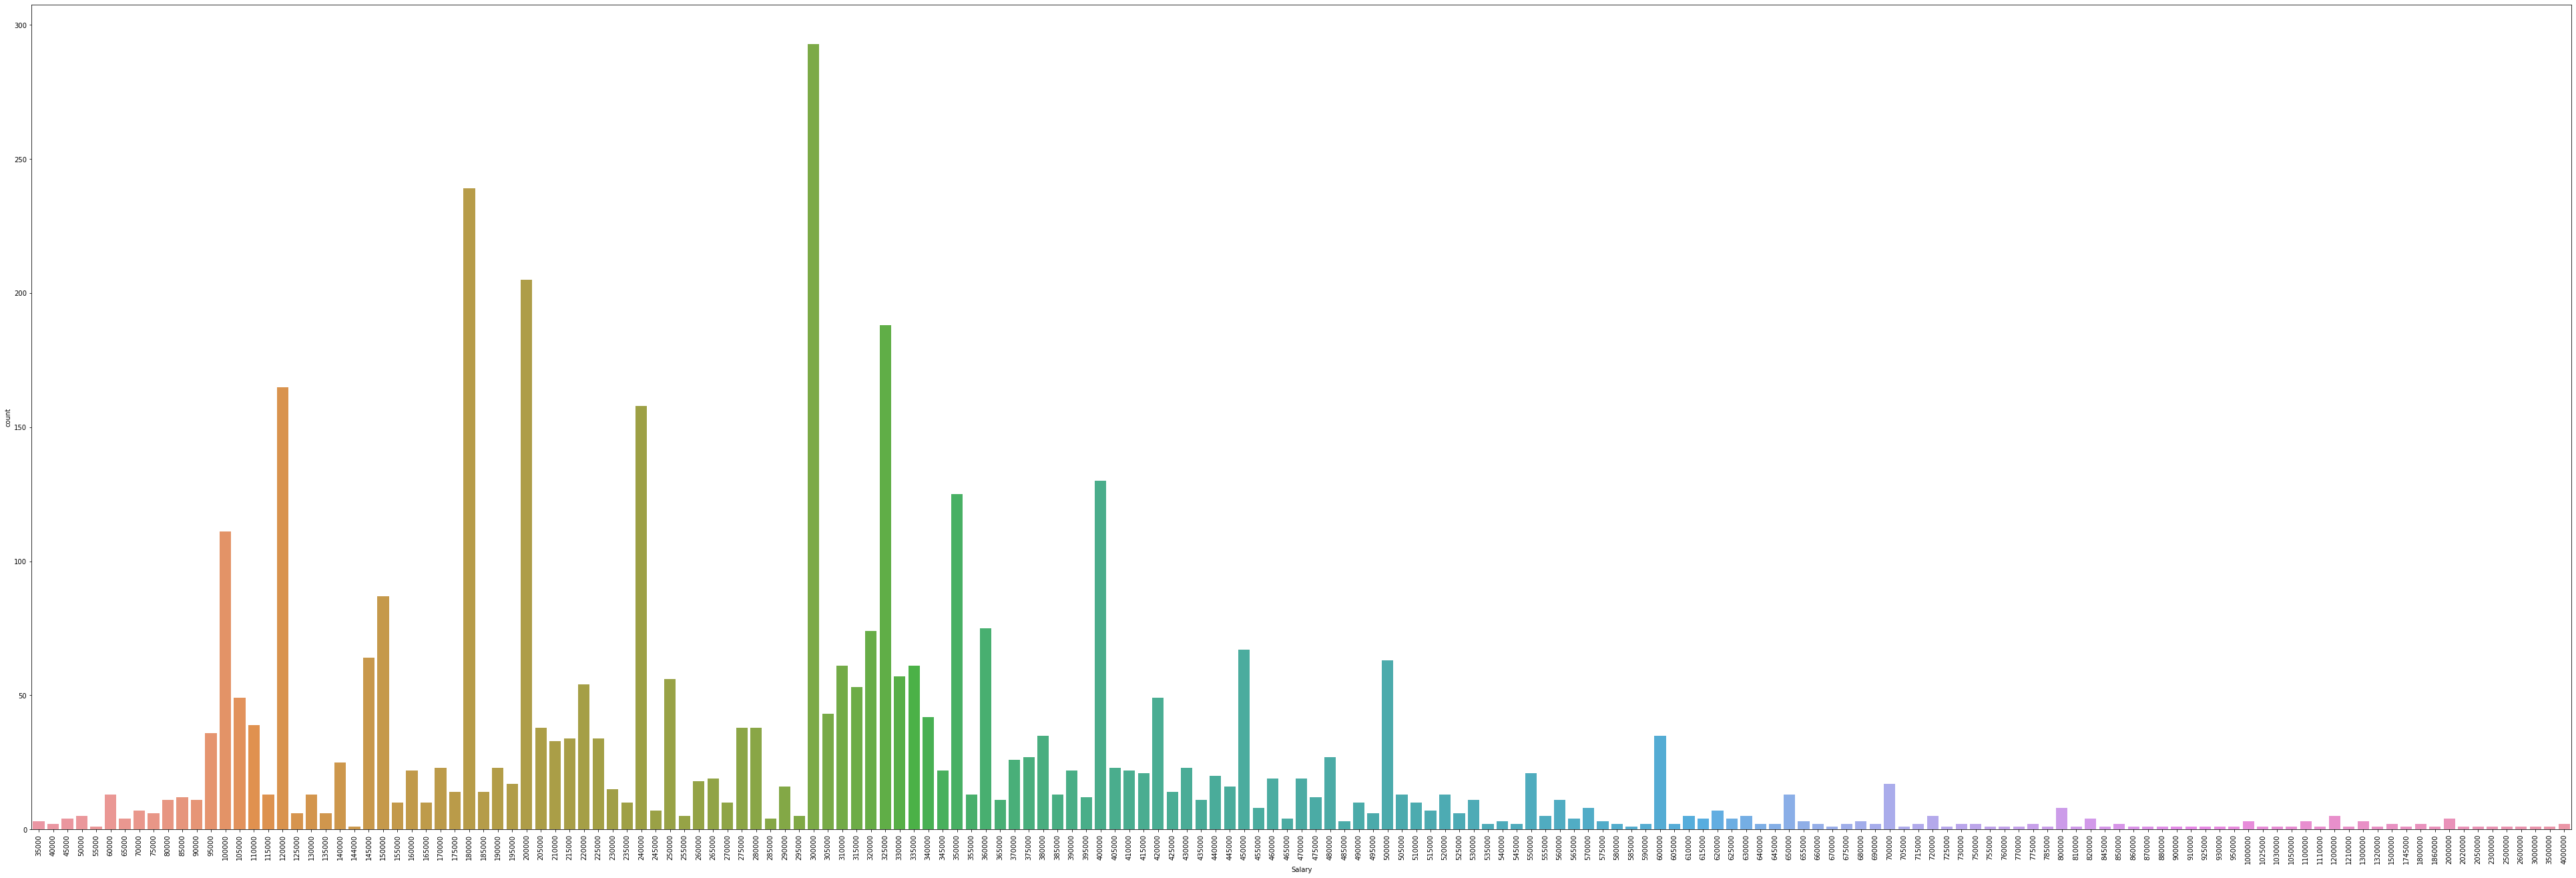

In [24]:
fig = plt.figure(figsize = (150,50))
A12 = fig.add_subplot(222)
A = sns.countplot(df['Salary'] , ax = A12)
for item in A.get_xticklabels():
    item.set_rotation(90)    
plt.show()

# Checking Outlier in columns

<AxesSubplot:xlabel='Salary'>

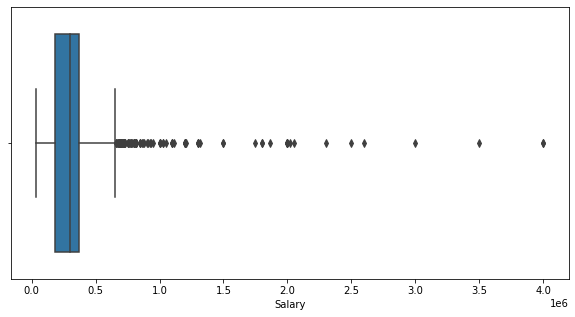

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['Salary'])

<AxesSubplot:xlabel='10percentage'>

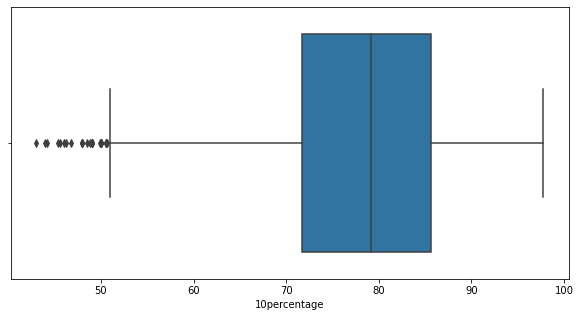

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['10percentage'])

<AxesSubplot:xlabel='12graduation'>

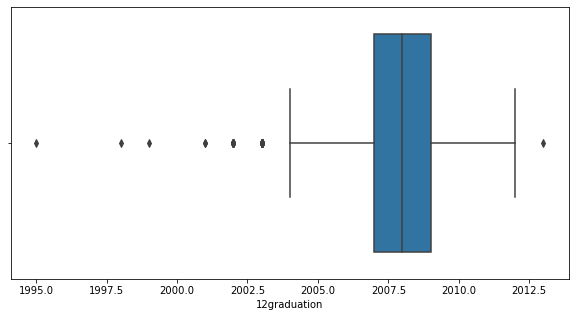

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['12graduation'])

<AxesSubplot:xlabel='12percentage'>

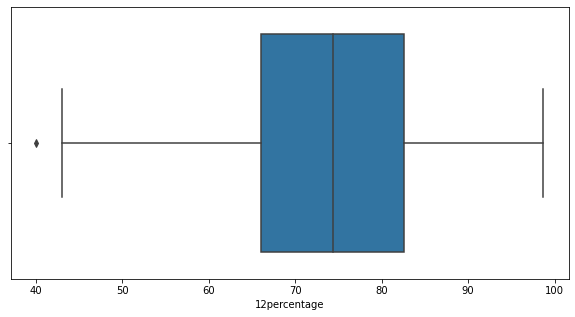

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['12percentage'])

<AxesSubplot:xlabel='CollegeID'>

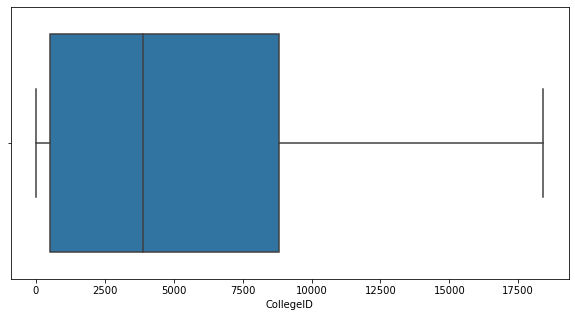

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['CollegeID'])

<AxesSubplot:xlabel='CollegeTier'>

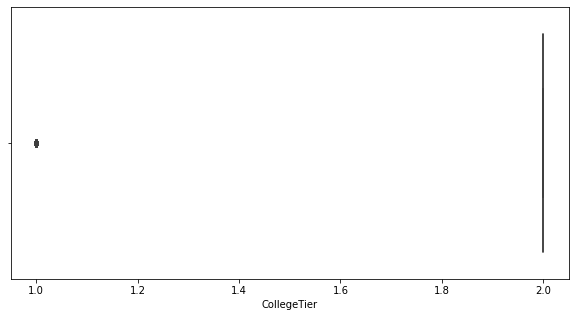

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['CollegeTier'])

<AxesSubplot:xlabel='CollegeCityID'>

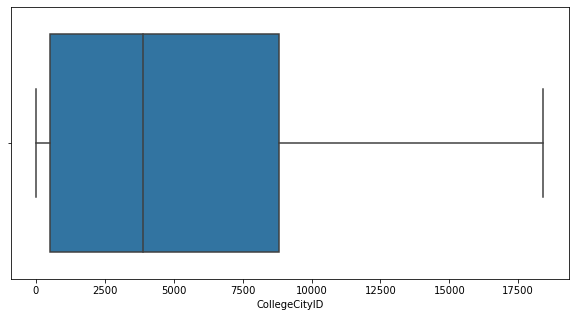

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['CollegeCityID'])

<AxesSubplot:xlabel='GraduationYear'>

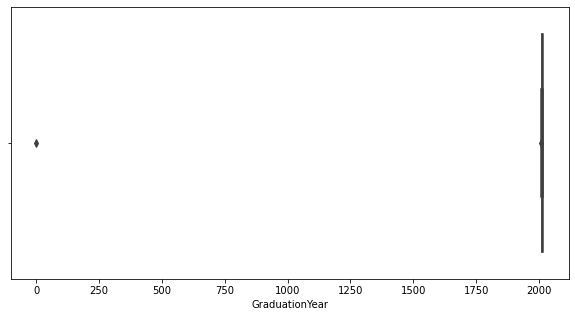

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['GraduationYear'])

<AxesSubplot:xlabel='English'>

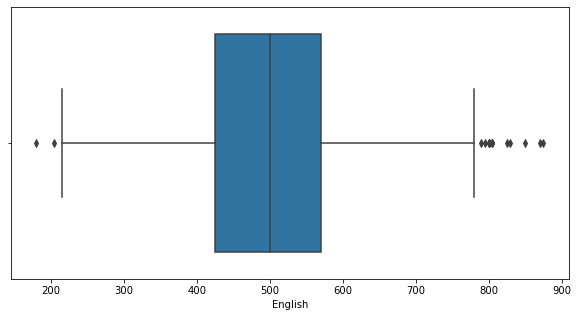

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['English'])

<AxesSubplot:xlabel='Logical'>

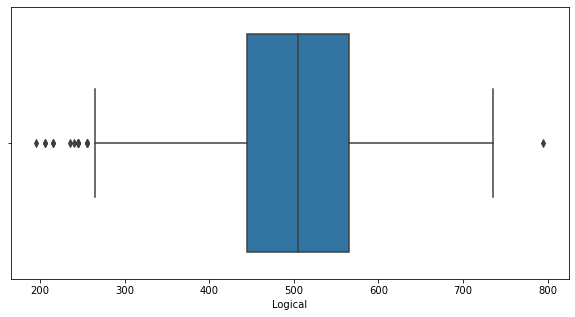

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['Logical'])

<AxesSubplot:xlabel='Quant'>

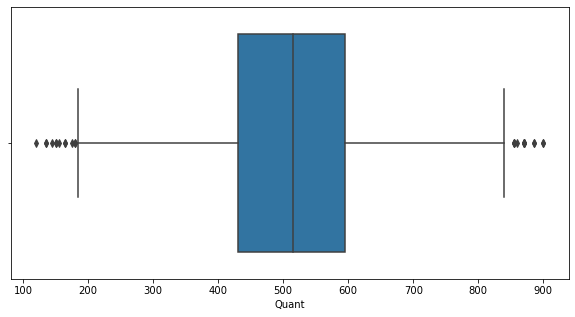

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['Quant'])

<AxesSubplot:xlabel='Domain'>

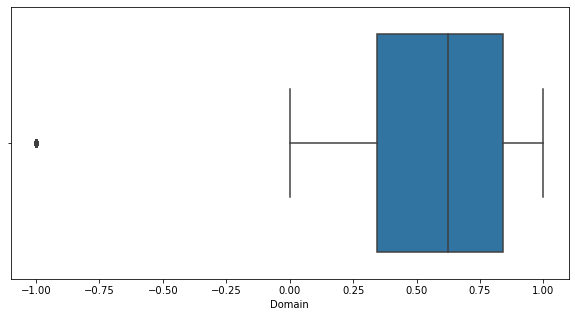

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df["Domain"])

<AxesSubplot:xlabel='ComputerProgramming'>

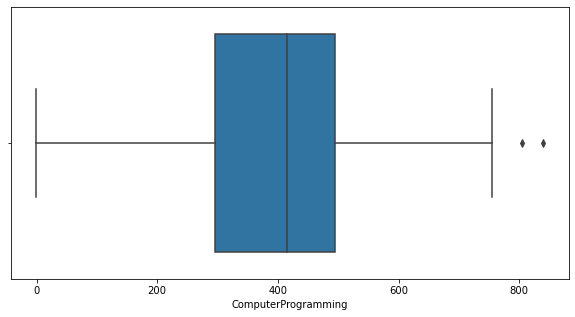

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['ComputerProgramming'])

<AxesSubplot:xlabel='ElectronicsAndSemicon'>

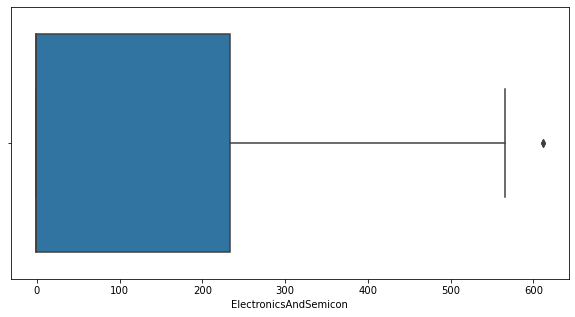

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['ElectronicsAndSemicon'])

<AxesSubplot:xlabel='ComputerScience'>

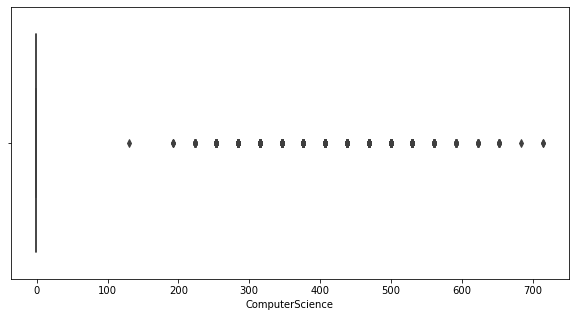

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['ComputerScience'])

<AxesSubplot:xlabel='MechanicalEngg'>

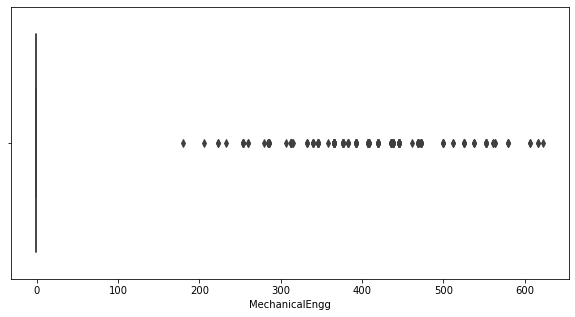

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['MechanicalEngg'])

<AxesSubplot:xlabel='ElectricalEngg'>

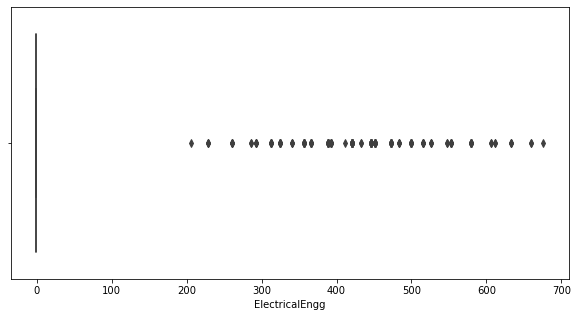

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['ElectricalEngg'])

<AxesSubplot:xlabel='TelecomEngg'>

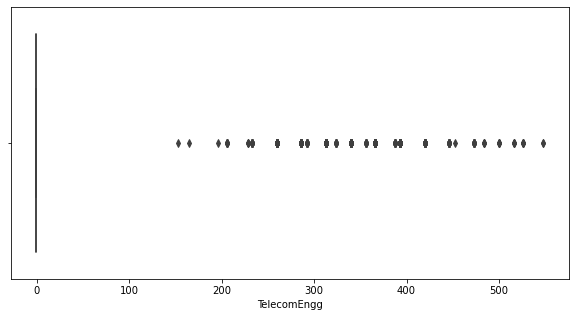

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['TelecomEngg'])

<AxesSubplot:xlabel='CivilEngg'>

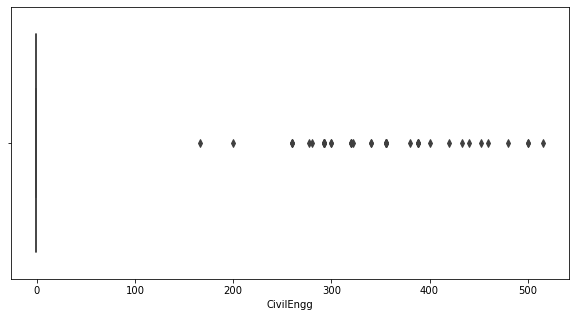

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['CivilEngg'])

<AxesSubplot:xlabel='conscientiousness'>

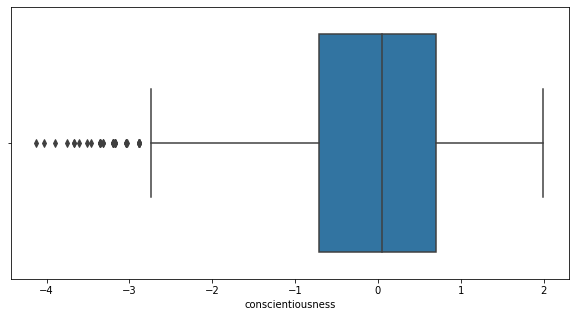

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['conscientiousness'])

<AxesSubplot:xlabel='agreeableness'>

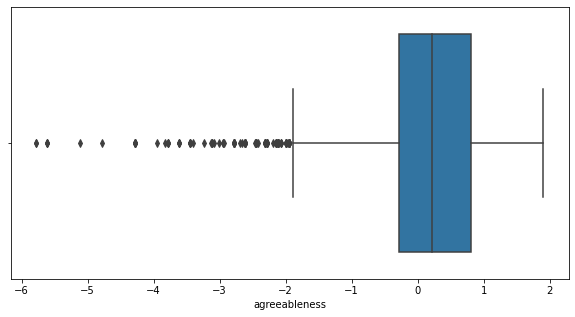

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['agreeableness'])

<AxesSubplot:xlabel='extraversion'>

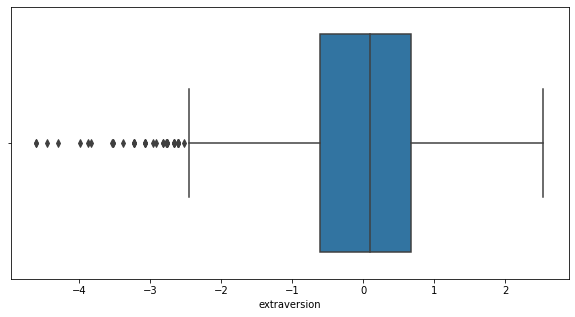

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['extraversion'])

<AxesSubplot:xlabel='nueroticism'>

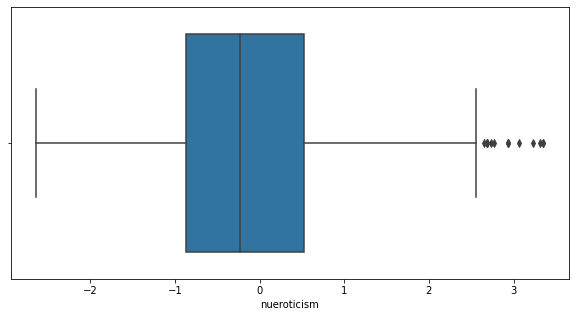

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['nueroticism'])

<AxesSubplot:xlabel='openess_to_experience'>

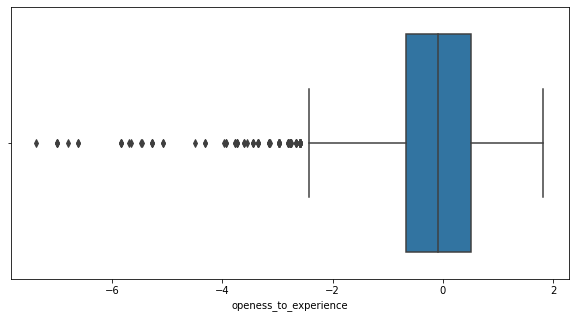

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df['openess_to_experience'])

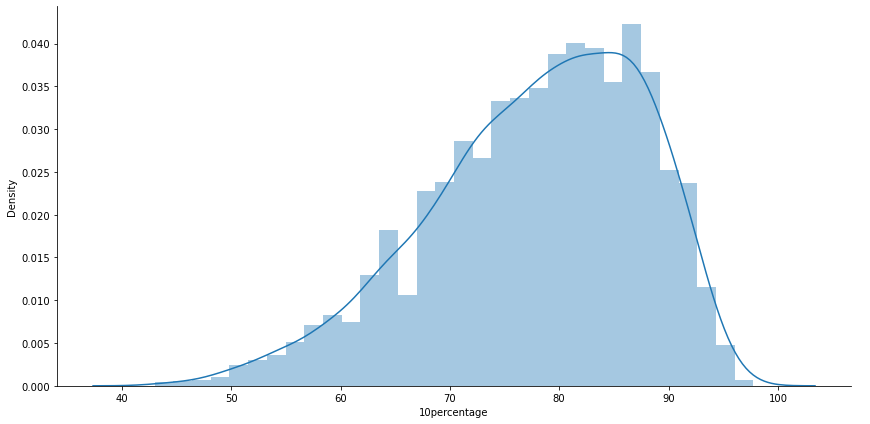

In [49]:
# 10th Percentage
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"10percentage").add_legend()

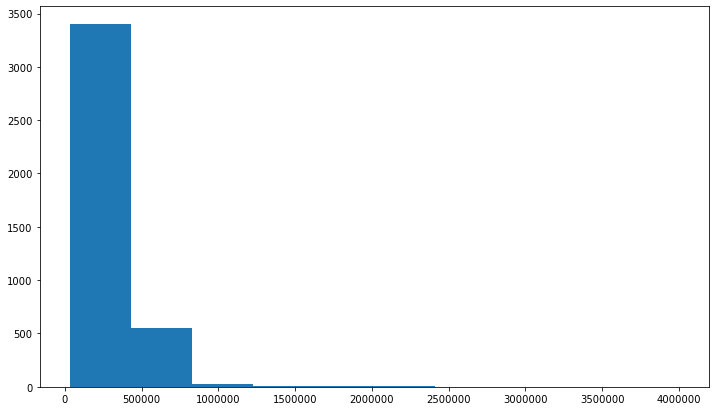

In [50]:
# Salary
plt.figure(figsize = (12,7))
plt.hist(df['Salary'],bins=10)
plt.ticklabel_format(style='plain')

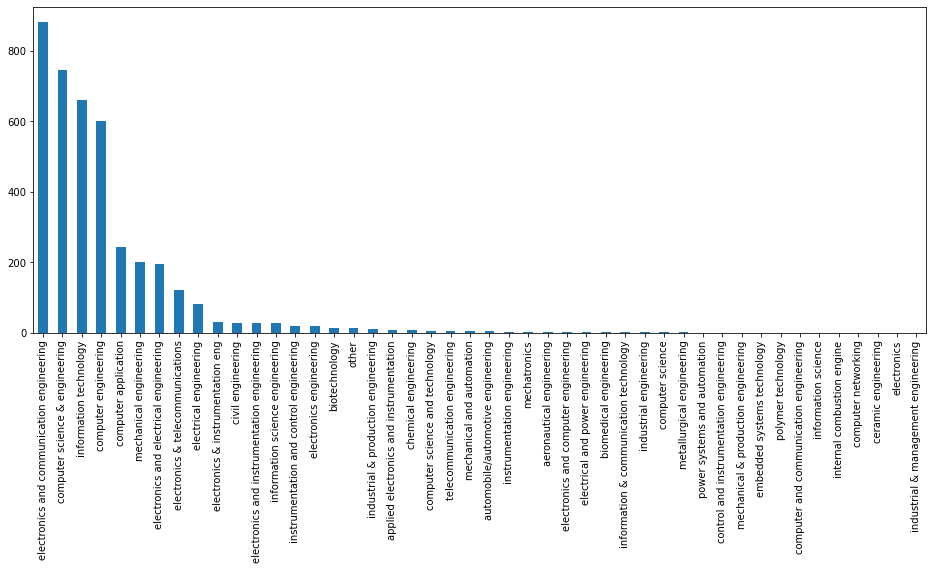

In [51]:
# Specialization
plt.figure(figsize=(16,6))
df['Specialization'].value_counts().plot(kind='bar')
plt.show()

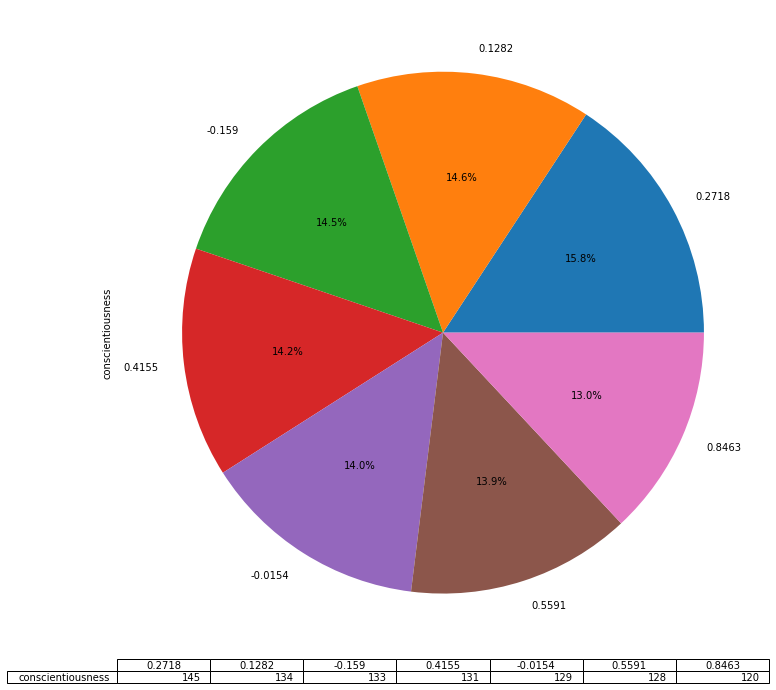

In [52]:
# conscientiousness
plt.figure(figsize=(12,12))
df.conscientiousness.value_counts().iloc[:7].plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

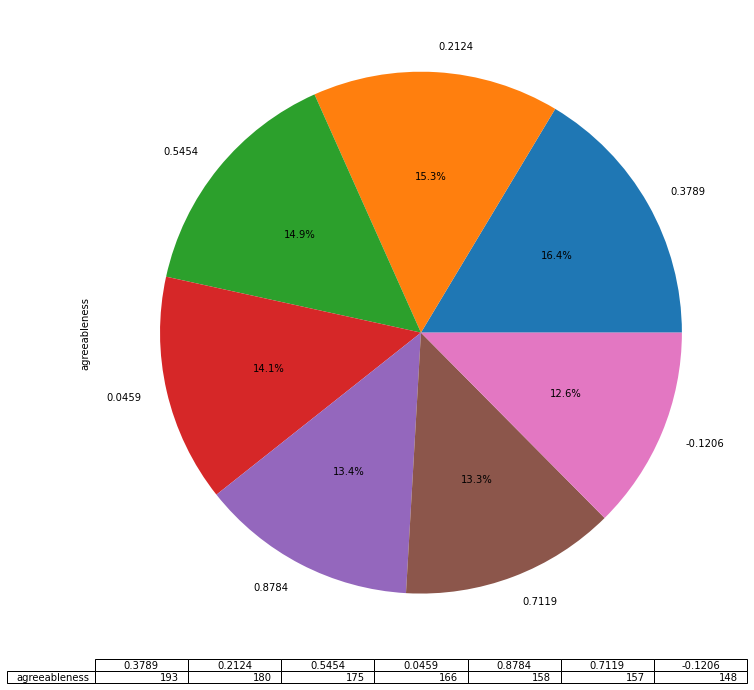

In [53]:
plt.figure(figsize=(12,12))
df.agreeableness.value_counts().iloc[:7].plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

In [54]:
Specialization_freq = df['Specialization'].value_counts()

In [55]:
Specialization_map = \
{'electronics and communication engineering' : 'Electronics_Engg',
 'computer science & engineering' : 'Computer_Engg',
 'information technology' : 'IT_Engg' ,
 'computer engineering' : 'Computer_Engg',
 'computer application' : 'Computer_Engg',
 'mechanical engineering' : 'Mechanical_Engg',
 'electronics and electrical engineering' : 'Electronics_Engg',
 'electronics & telecommunications' : 'Electronics_Engg',
 'electrical engineering' : 'Electrical_Engg',
 'electronics & instrumentation eng' : 'Electronics_Engg',
 'civil engineering' : 'Computer_Engg',
 'electronics and instrumentation engineering' : 'Electronics_Engg',
 'information science engineering' : 'IT_Engg',
 'instrumentation and control engineering' : 'Electronics_Engg',
 'electronics engineering' : 'Electronics_Engg',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'Electronics_Engg',
 'computer science and technology' : 'Computer_Engg',
 'telecommunication engineering' : 'Electronics_Engg',
 'mechanical and automation' : 'Mechanical_Engg',
 'automobile/automotive engineering' : 'Mechanical_Engg',
 'instrumentation engineering' : 'Electronics_Engg',
 'mechatronics' : 'Mechanical_Engg',
 'electronics and computer engineering' : 'Computer_Engg',
 'aeronautical engineering' : 'Mechanical_Engg',
 'computer science' : 'Computer_Engg',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'Electronics_Engg',
 'electrical and power engineering' : 'Electrical_Engg',
 'industrial & management engineering' : 'other',
 'computer networking' : 'Computer_Engg',
 'embedded systems technology' : 'Electronics_Engg',
 'power systems and automation' : 'Electrical_Engg',
 'computer and communication engineering' : 'Computer_Engg',
 'information science' : 'IT_Engg',
 'internal combustion engine' : 'Mechanical_Engg',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'Mechanical_Engg',
 'control and instrumentation engineering' : 'Electronics_Engg',
 'polymer technology' : 'other',
 'electronics' : 'Electronics_Engg'}

In [56]:
df['Specialization'] = df['Specialization'].map(Specialization_map)

print(df['Specialization'].unique())

['Computer_Engg' 'Electronics_Engg' 'IT_Engg' 'Mechanical_Engg'
 'Electrical_Engg' 'other']


<AxesSubplot:>

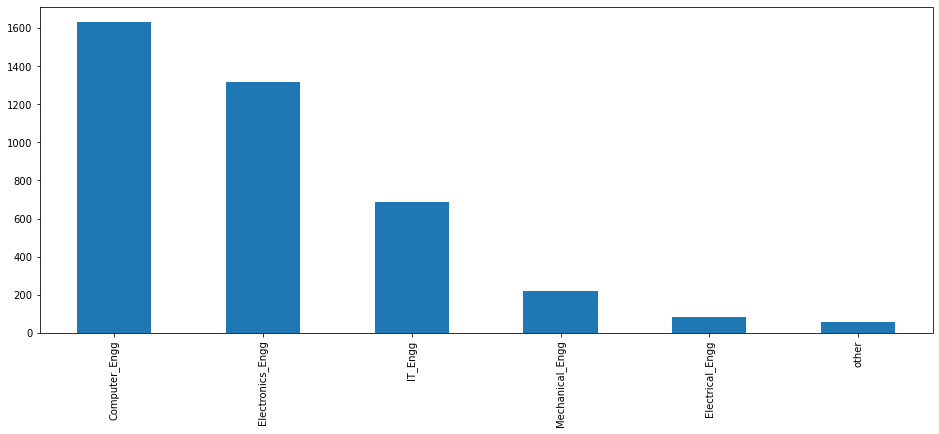

In [57]:
df['Specialization'].value_counts().plot(kind='bar', figsize=(16,6))

<AxesSubplot:xlabel='Gender', ylabel='count'>

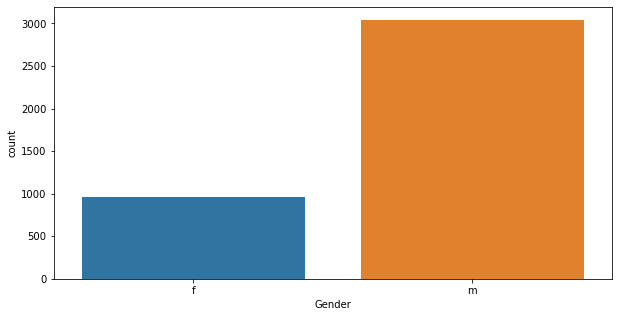

In [58]:
# Gender
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'])

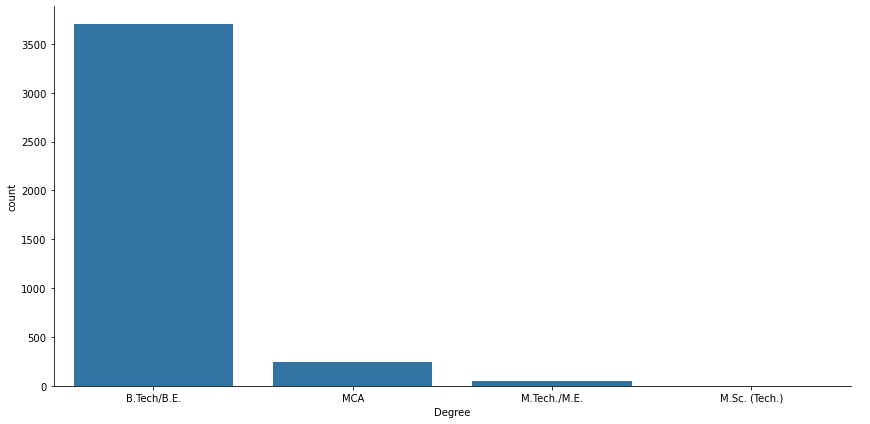

In [59]:
# Degree
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.countplot,"Degree").add_legend()

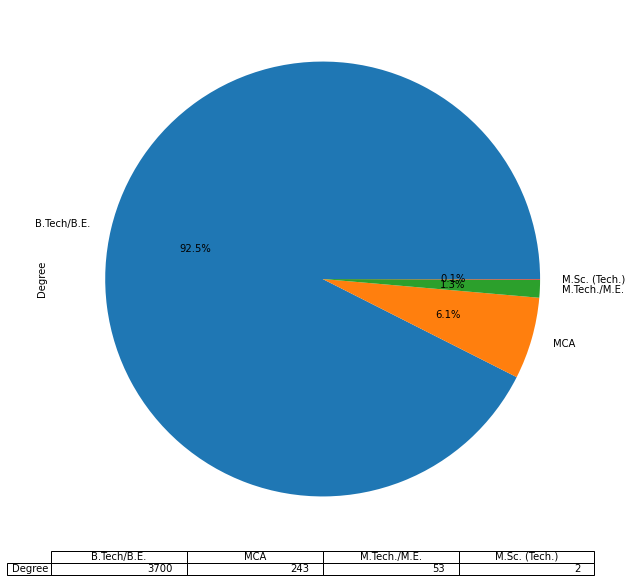

In [60]:
#Degree
plt.figure(figsize=(12,10))
df.Degree.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Specialization'>

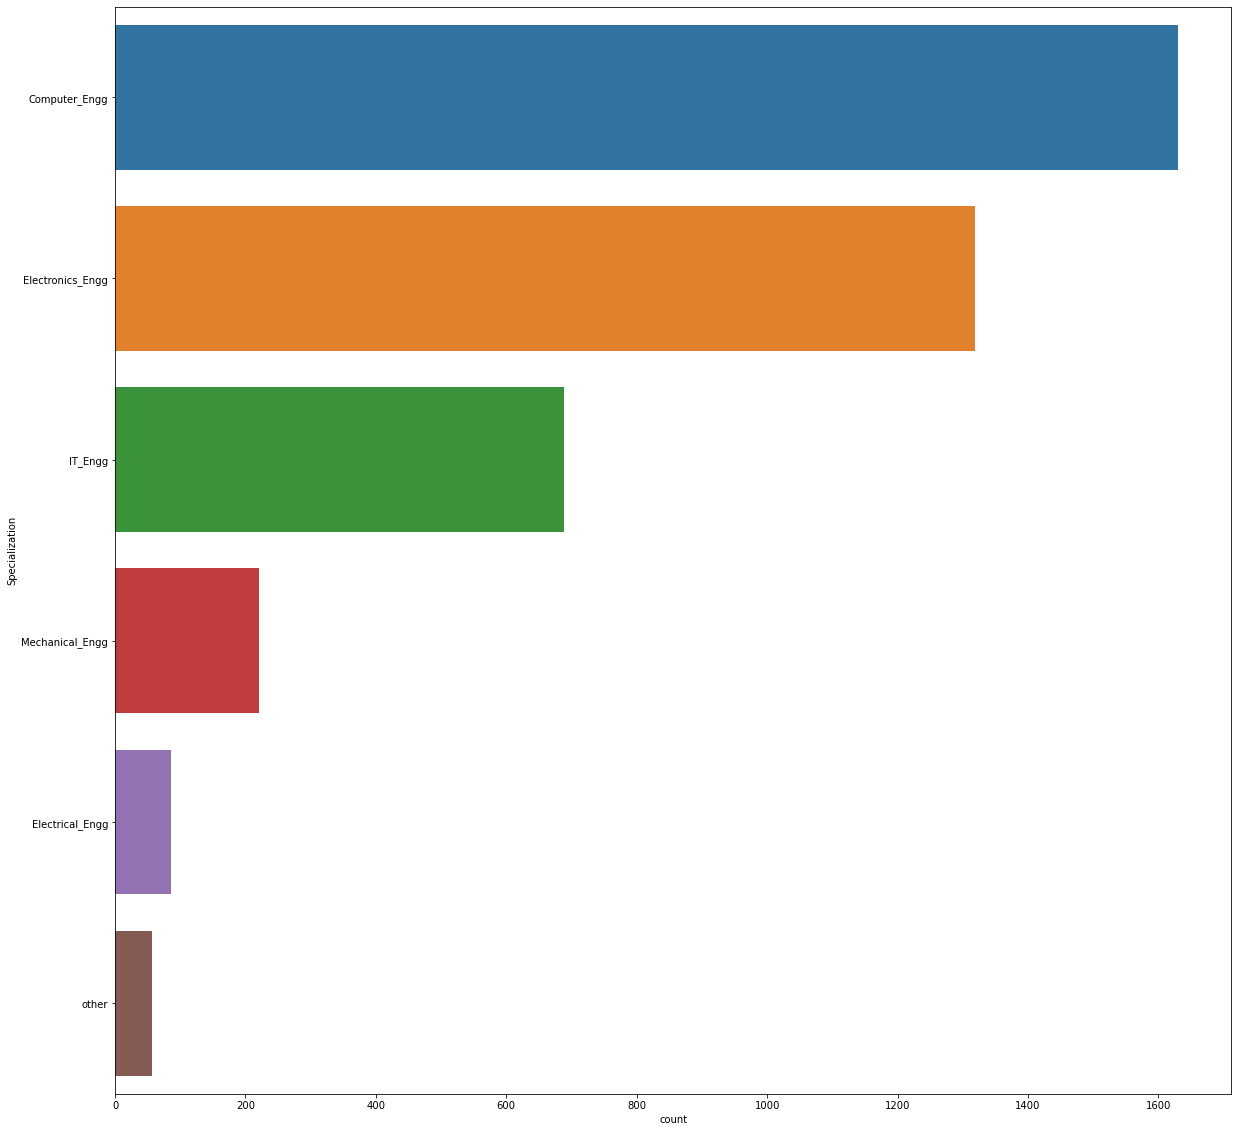

In [61]:
# Specialization
plt.figure(figsize=(20,20))
sns.countplot(y=df["Specialization"])

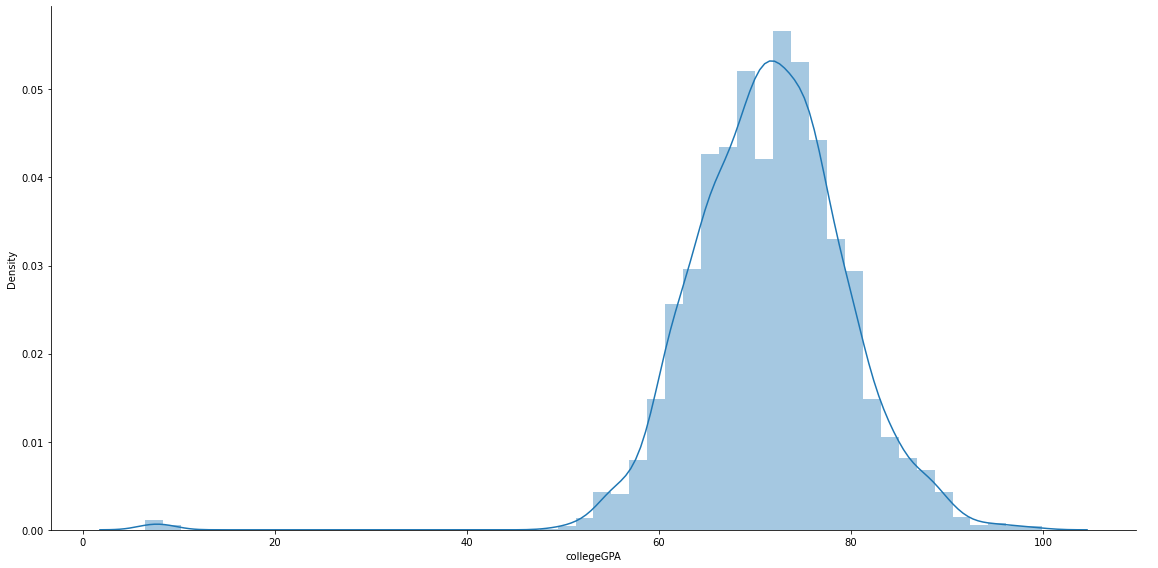

In [62]:
# Graduation GPA
sns.FacetGrid(data=df,size=8,aspect=2).map(sns.distplot,"collegeGPA").add_legend()

<AxesSubplot:xlabel='CollegeCityTier', ylabel='count'>

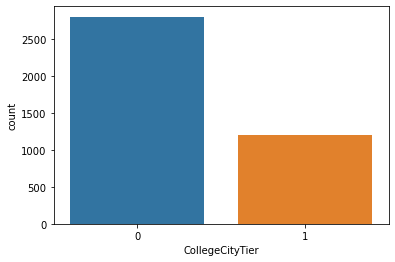

In [63]:
# College City Tier
sns.countplot(df['CollegeCityTier'])

<AxesSubplot:xlabel='count', ylabel='CollegeState'>

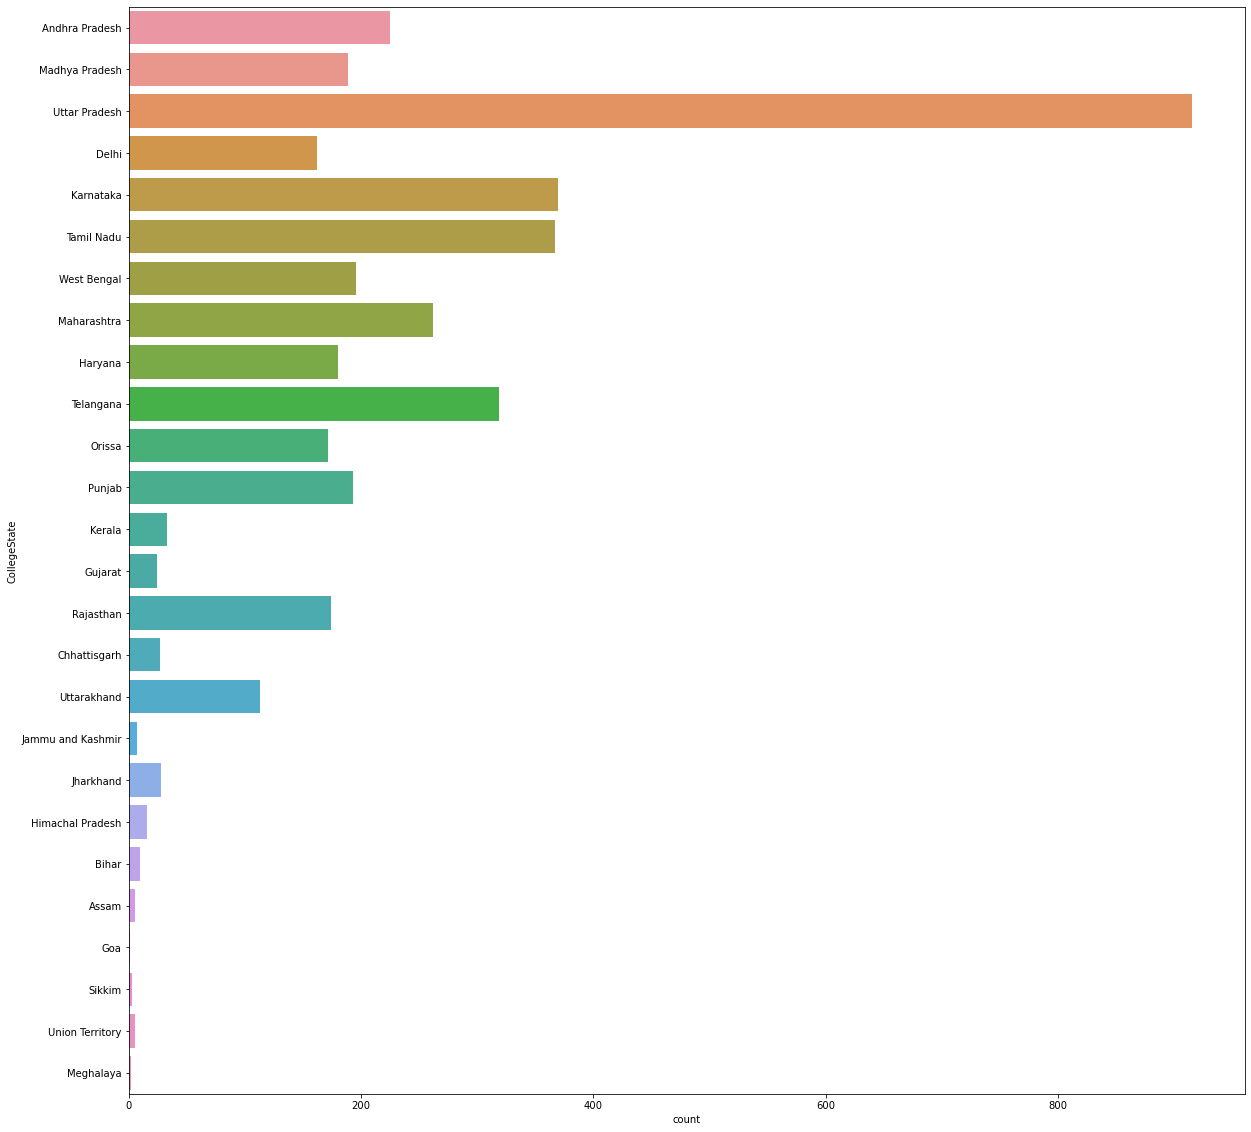

In [64]:
# College State
plt.figure(figsize=(20,20))
sns.countplot(y=df['CollegeState'])

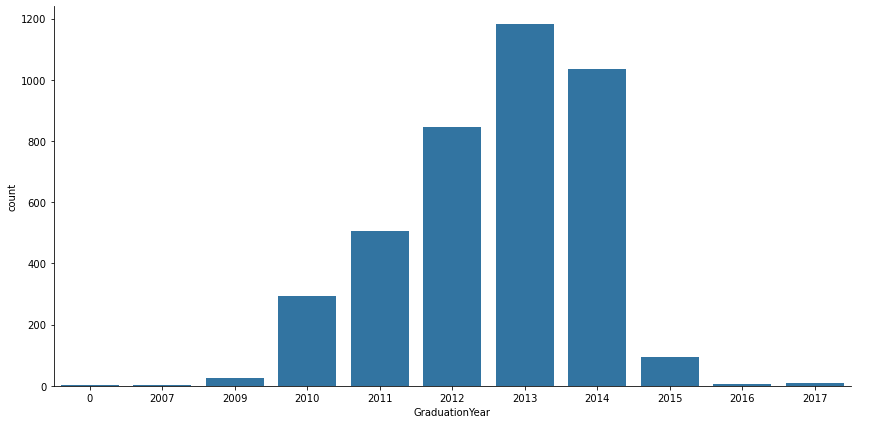

In [65]:
# Graduation Year
sns.FacetGrid(data=df,size=6, aspect=2).map(sns.countplot,"GraduationYear").add_legend()

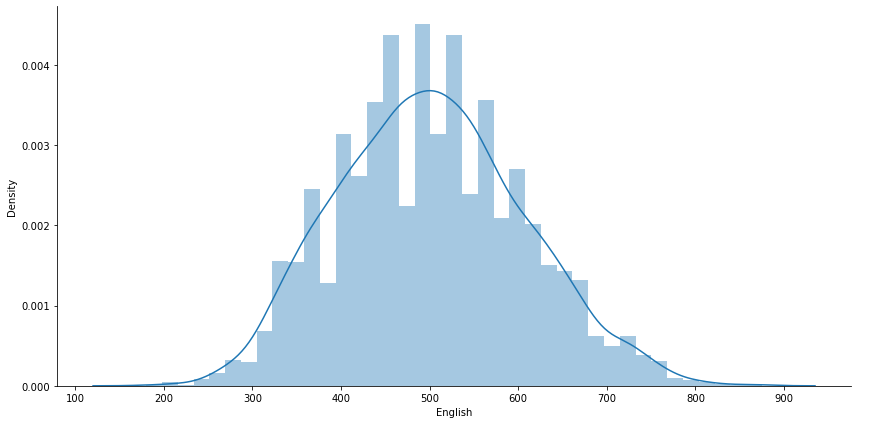

In [66]:
# English score
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"English").add_legend()

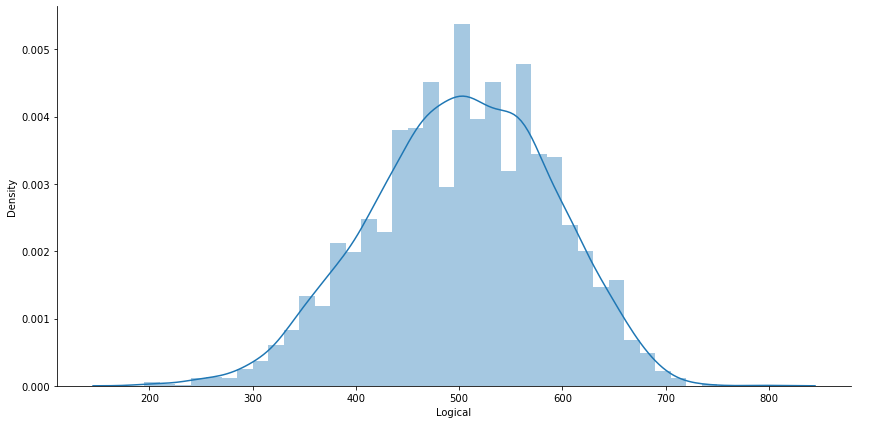

In [67]:
# Logical score
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"Logical").add_legend()

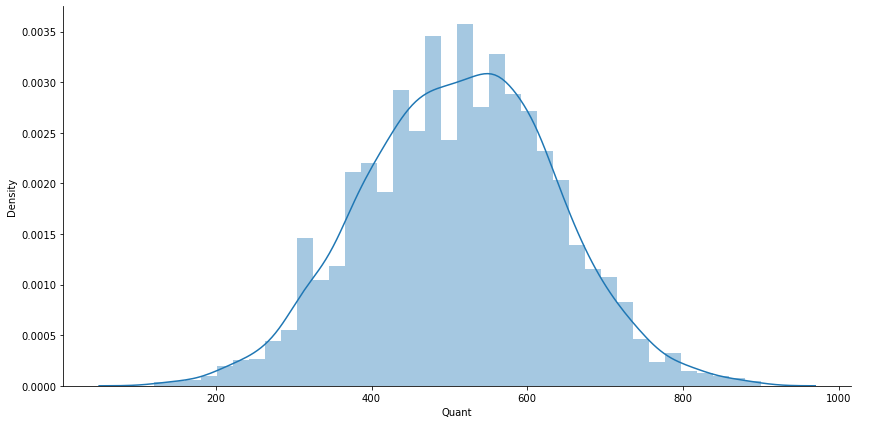

In [68]:
# Quant score
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"Quant").add_legend()

<AxesSubplot:xlabel='count', ylabel='Domain'>

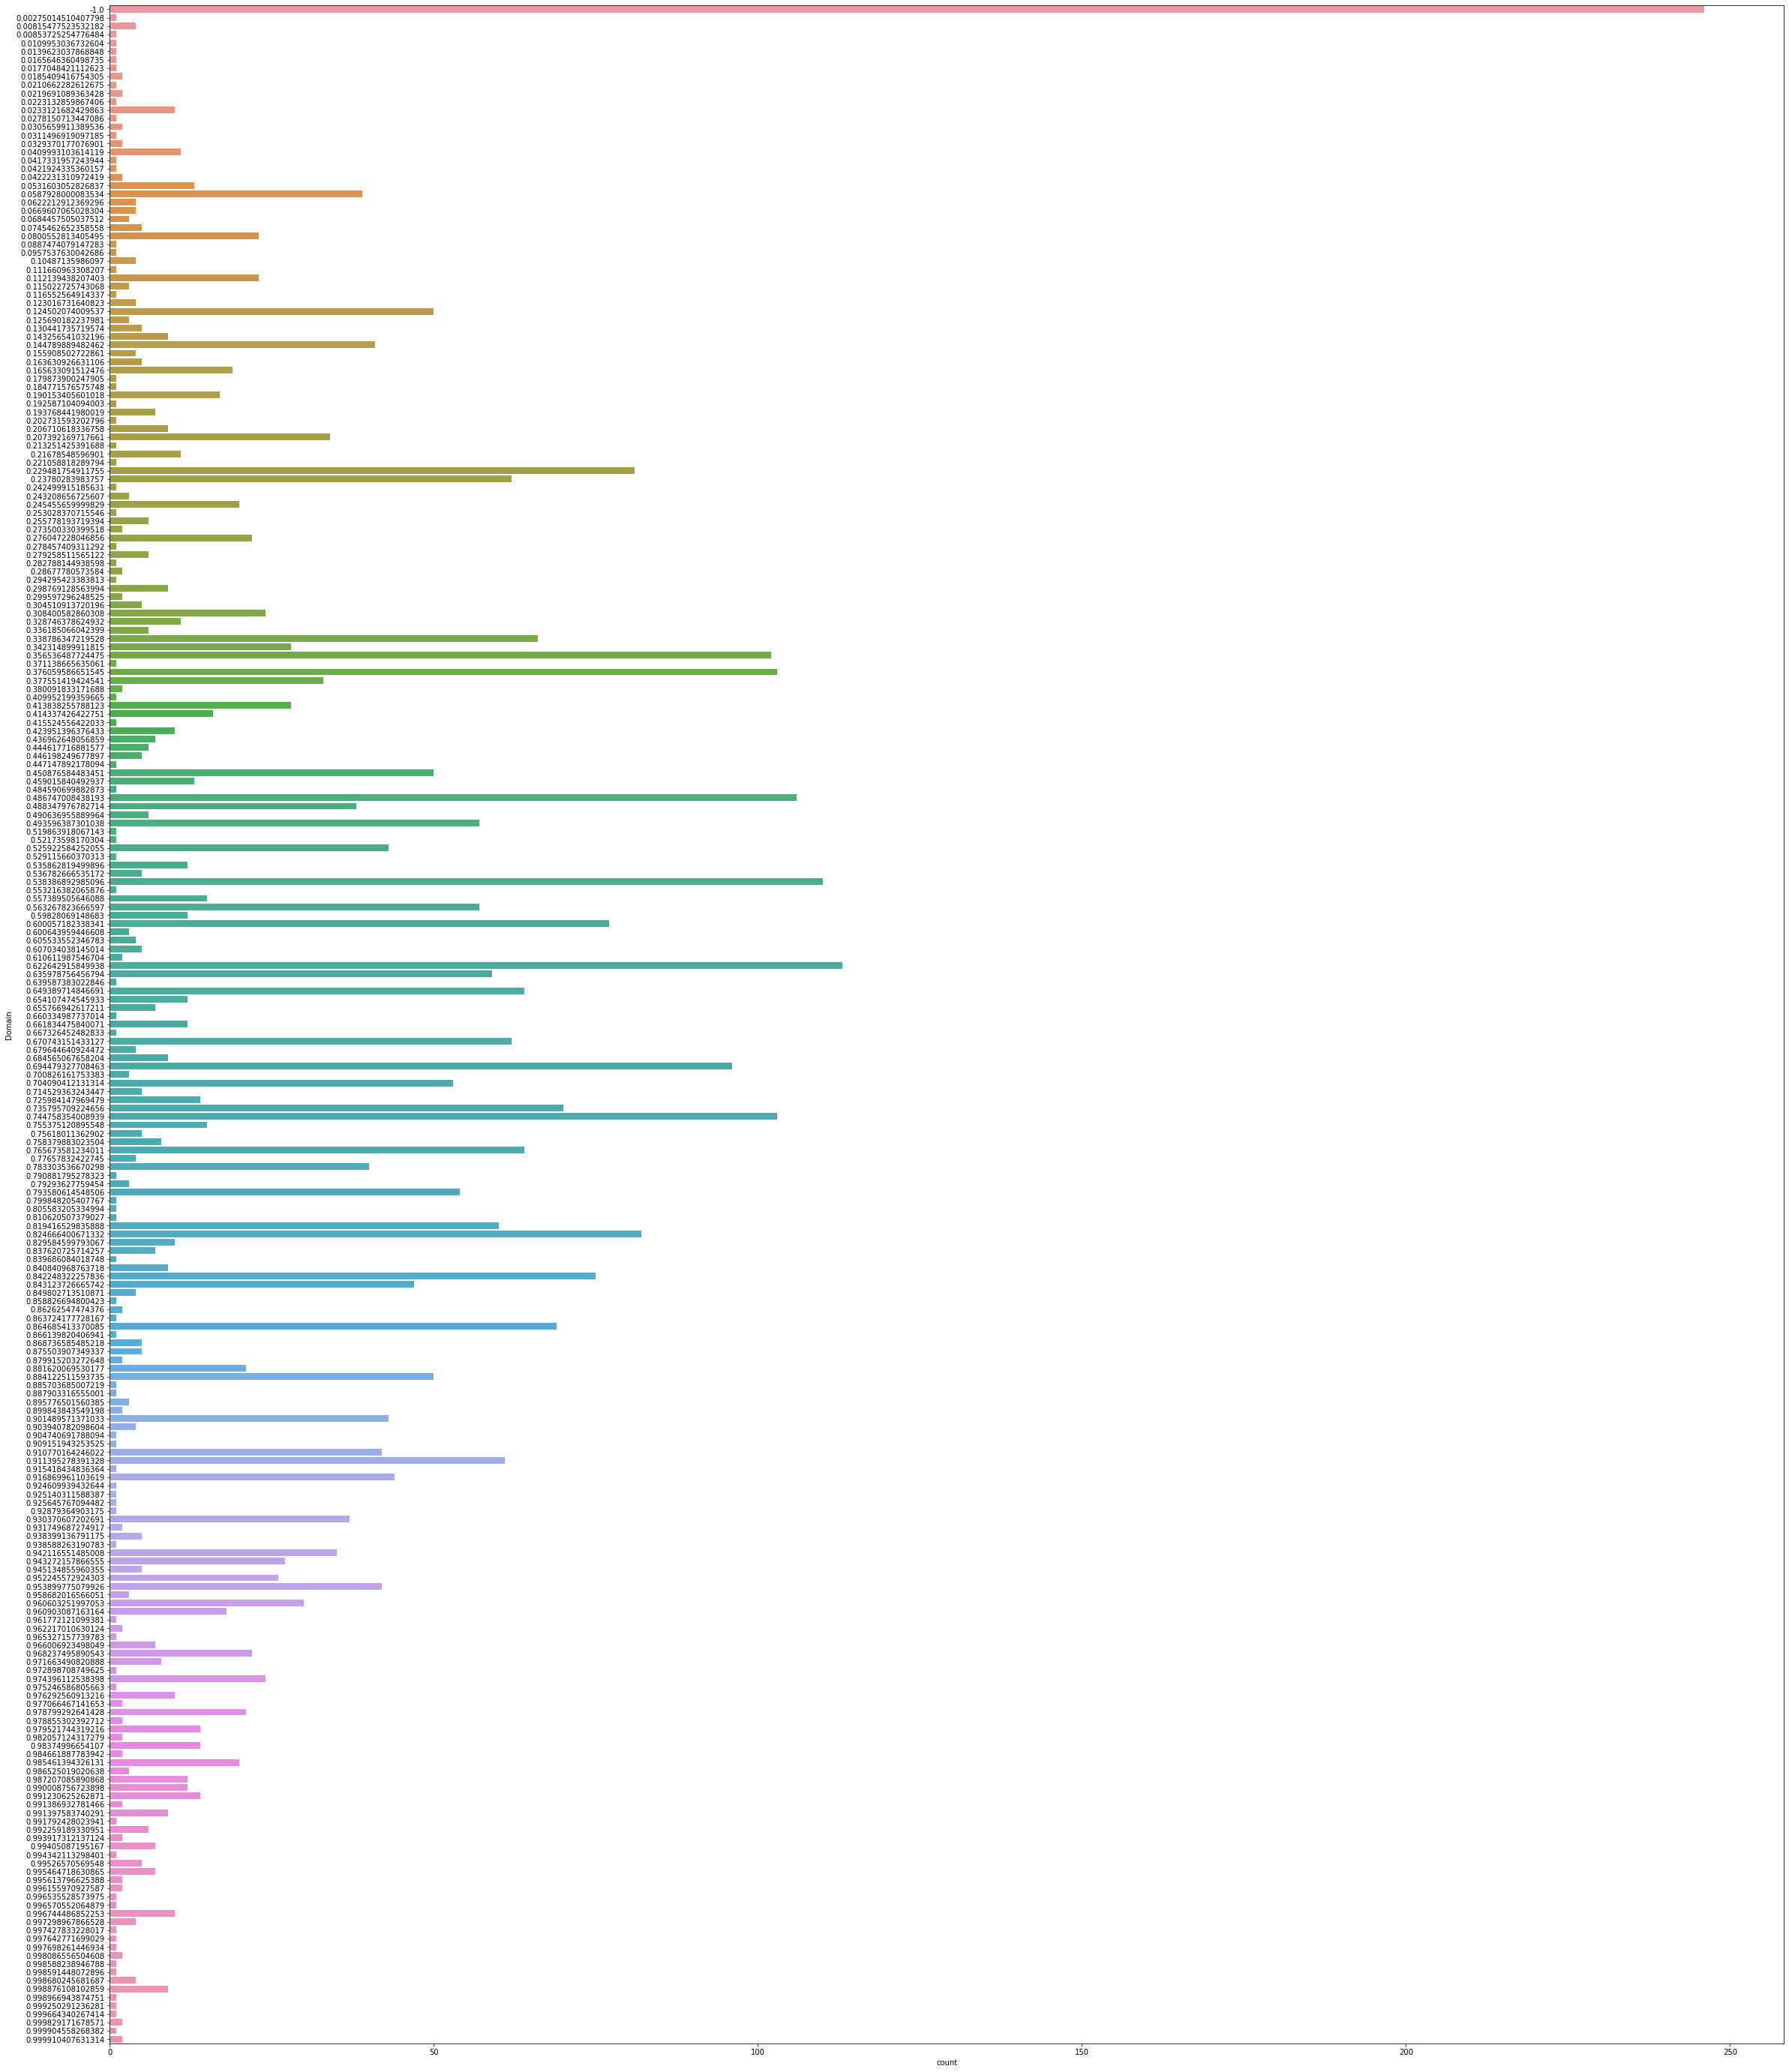

In [69]:
# Domain
plt.figure(figsize=(40,50))
sns.countplot(y=df["Domain"])

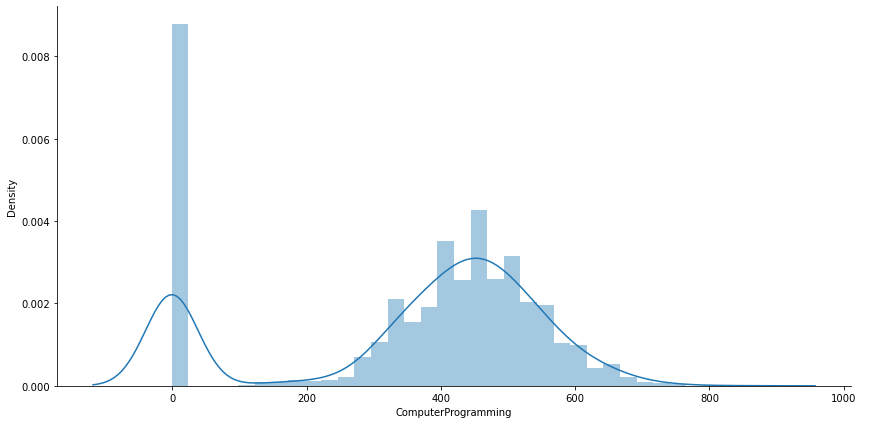

In [70]:
# Computer Programming
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"ComputerProgramming").add_legend()

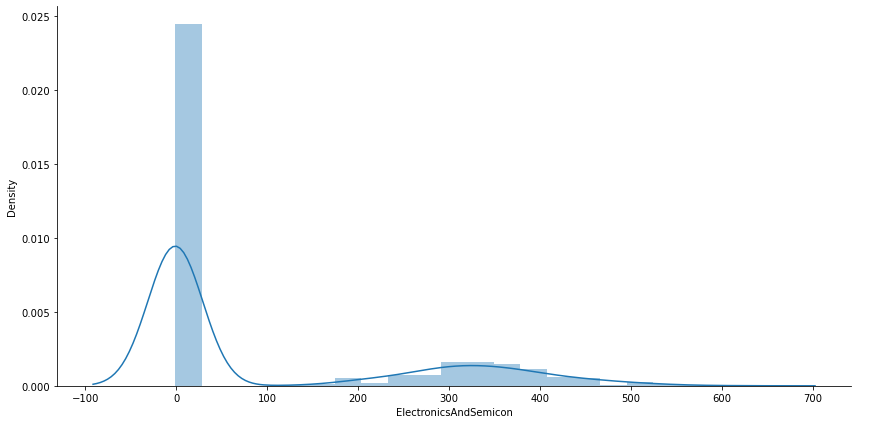

In [71]:
# Electronics And semicon
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"ElectronicsAndSemicon").add_legend()

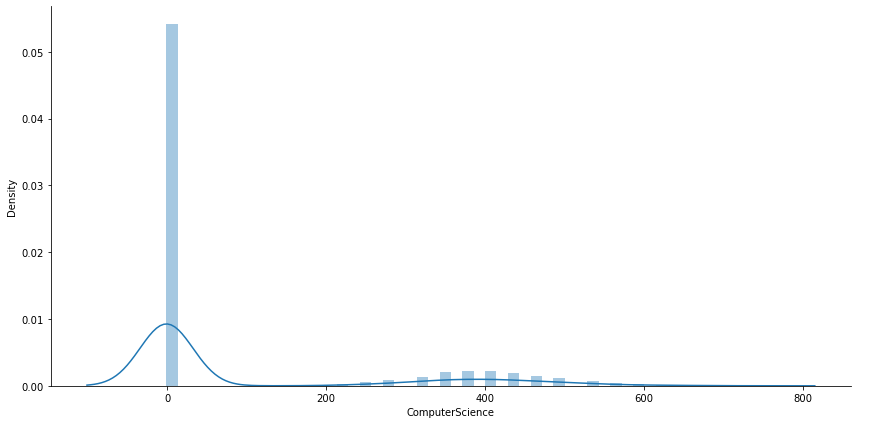

In [72]:
# Computer Science
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"ComputerScience").add_legend()

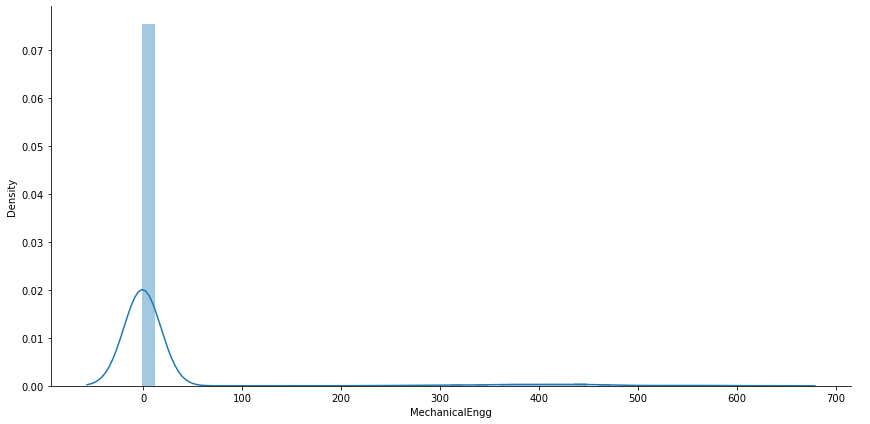

In [73]:
# Mechanical Engineering
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"MechanicalEngg").add_legend()

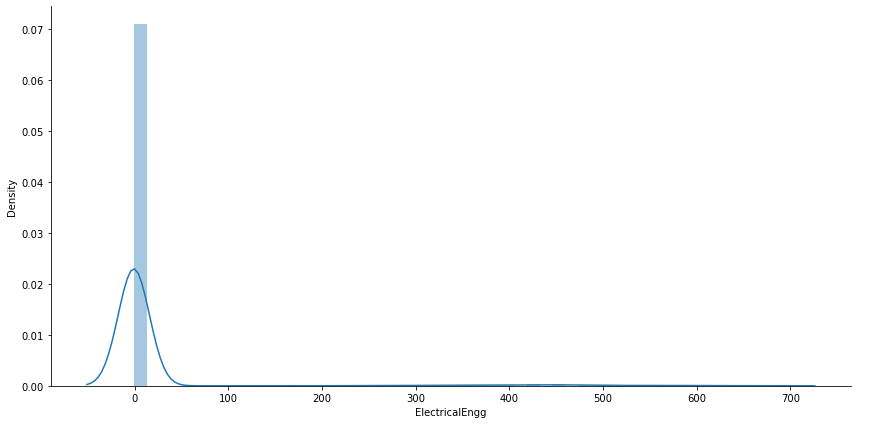

In [74]:
# Electrical Engineering
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"ElectricalEngg").add_legend()

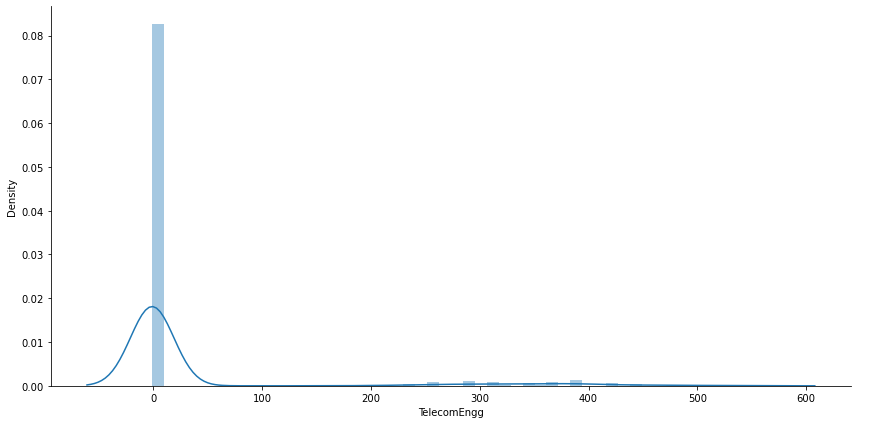

In [75]:
# Telecom engineering
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"TelecomEngg").add_legend()

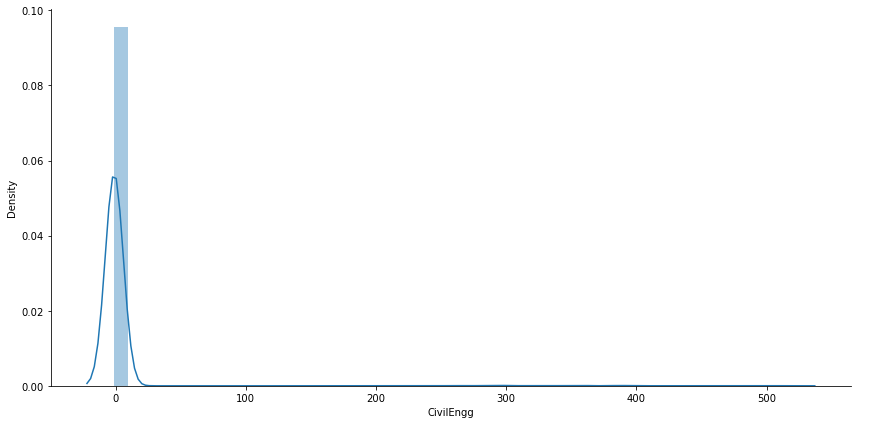

In [76]:
# Civil Engineering
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"CivilEngg").add_legend()

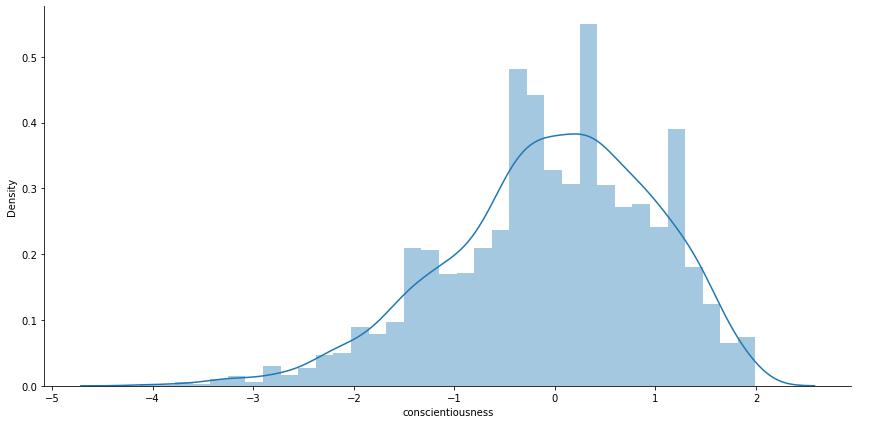

In [77]:
# conscientiousness
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"conscientiousness").add_legend()

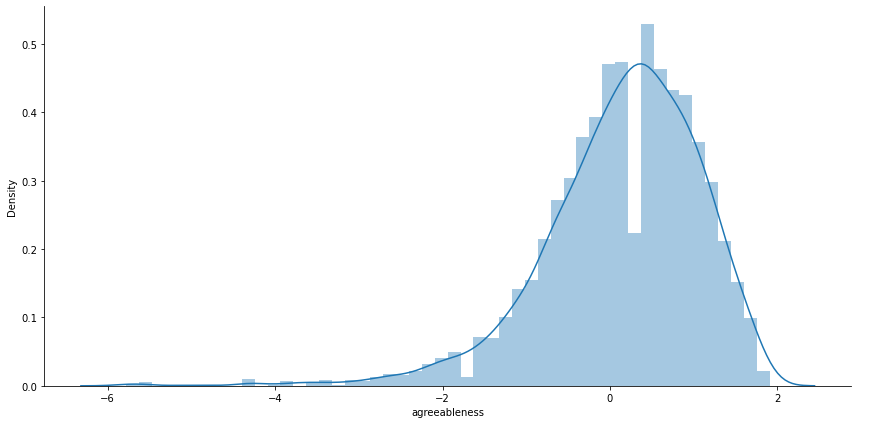

In [78]:
# Agreeableness
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"agreeableness").add_legend()

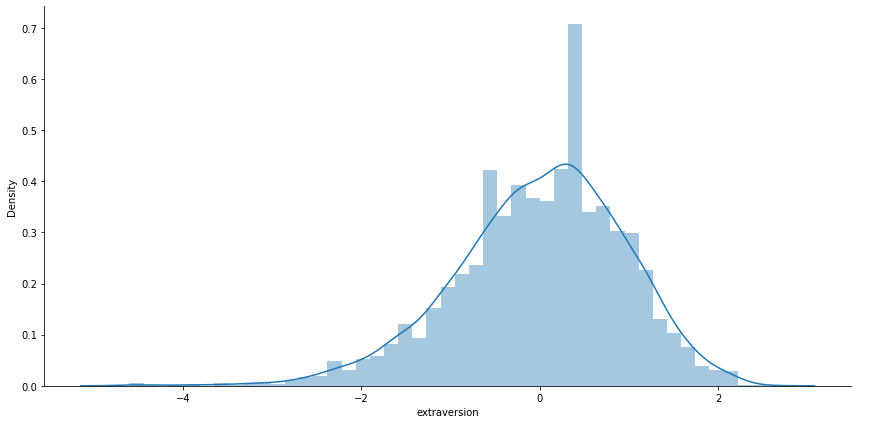

In [79]:
# Extraversion
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"extraversion").add_legend()

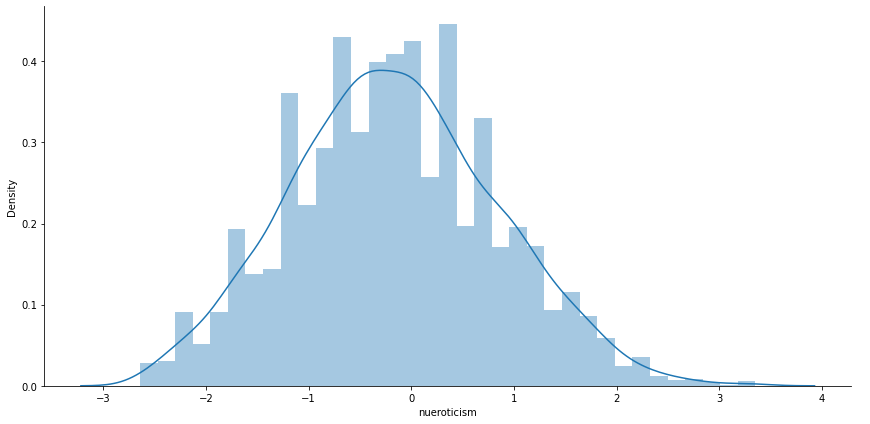

In [80]:
# Neuroticism
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"nueroticism").add_legend()

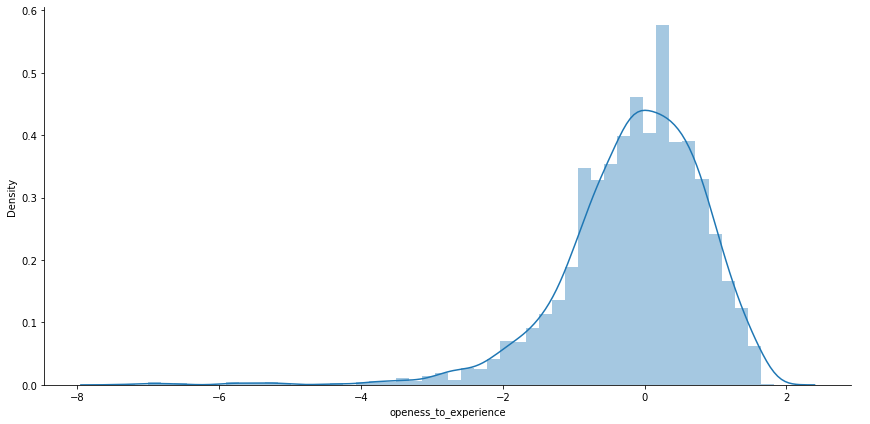

In [81]:
# Openess to Experience
sns.FacetGrid(data=df,size=6,aspect=2).map(sns.distplot,"openess_to_experience").add_legend()

In [82]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','state', 'cbse', 'icse', 'andhra pradesh state board', 'up bord', 'gujarat board', 'intermideate']

In [83]:
for i in replace_list_state:
    df['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df['12board'].replace(i,'icse',inplace=True)

In [84]:
df['12board'].replace(0,'others',inplace=True)

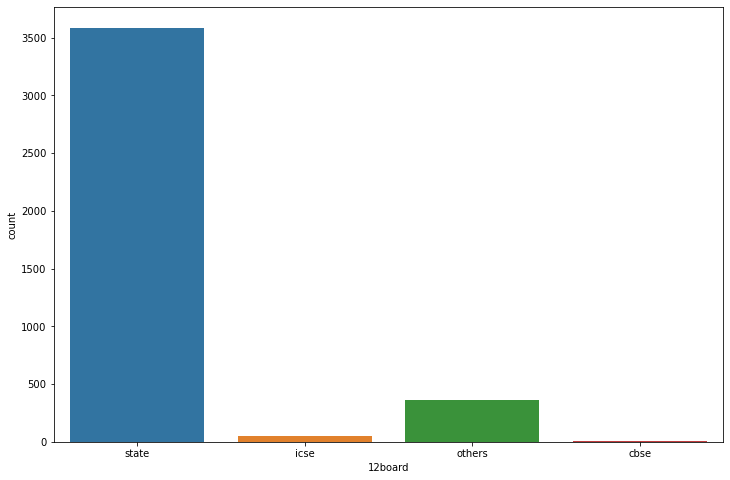

In [85]:
plt.figure(figsize=(12,8))
sns.countplot(x='12board',data=df)
plt.show()

Text(0.5, 0, 'collegeGPA')

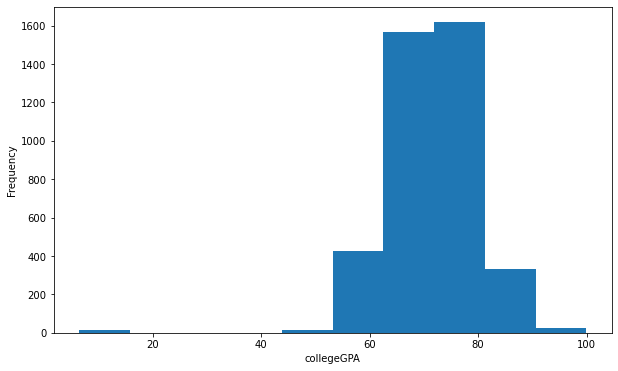

In [86]:
# College GPA 
plt.figure(figsize=(10,6))
df['collegeGPA'].plot(kind='hist')
plt.xlabel('collegeGPA')

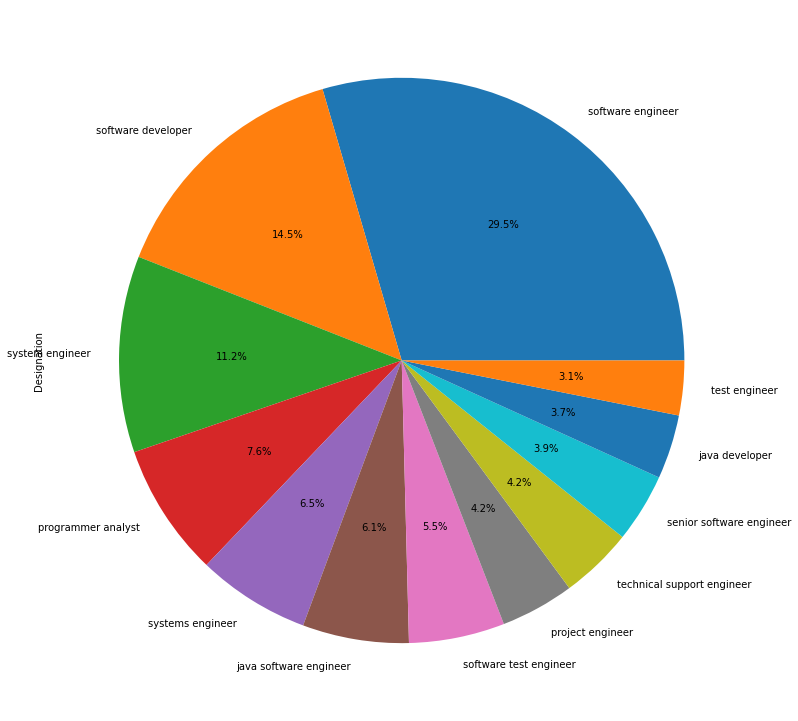

In [87]:
plt.figure(figsize=(13,13))
df.Designation.value_counts().iloc[:12].plot(kind='pie', autopct='%1.1f%%')
plt.show()

# Bivariate Analysis

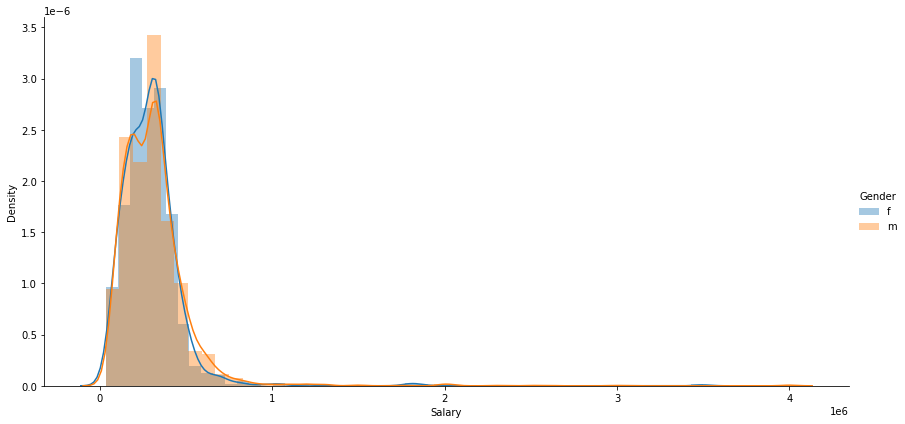

In [88]:
# Salary By Gender
sns.FacetGrid(data=df,hue='Gender',size=6,aspect=2).map(sns.distplot,"Salary").add_legend()

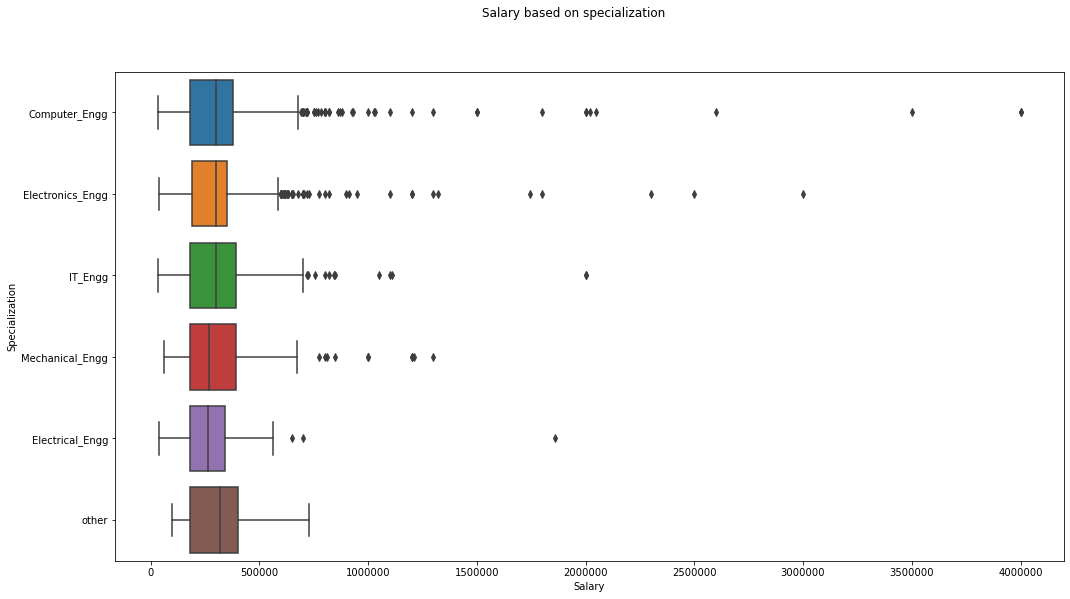

In [89]:
# Salary based on specialization
plt.figure(figsize=(17,9))
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary based on specialization')
plt.show()

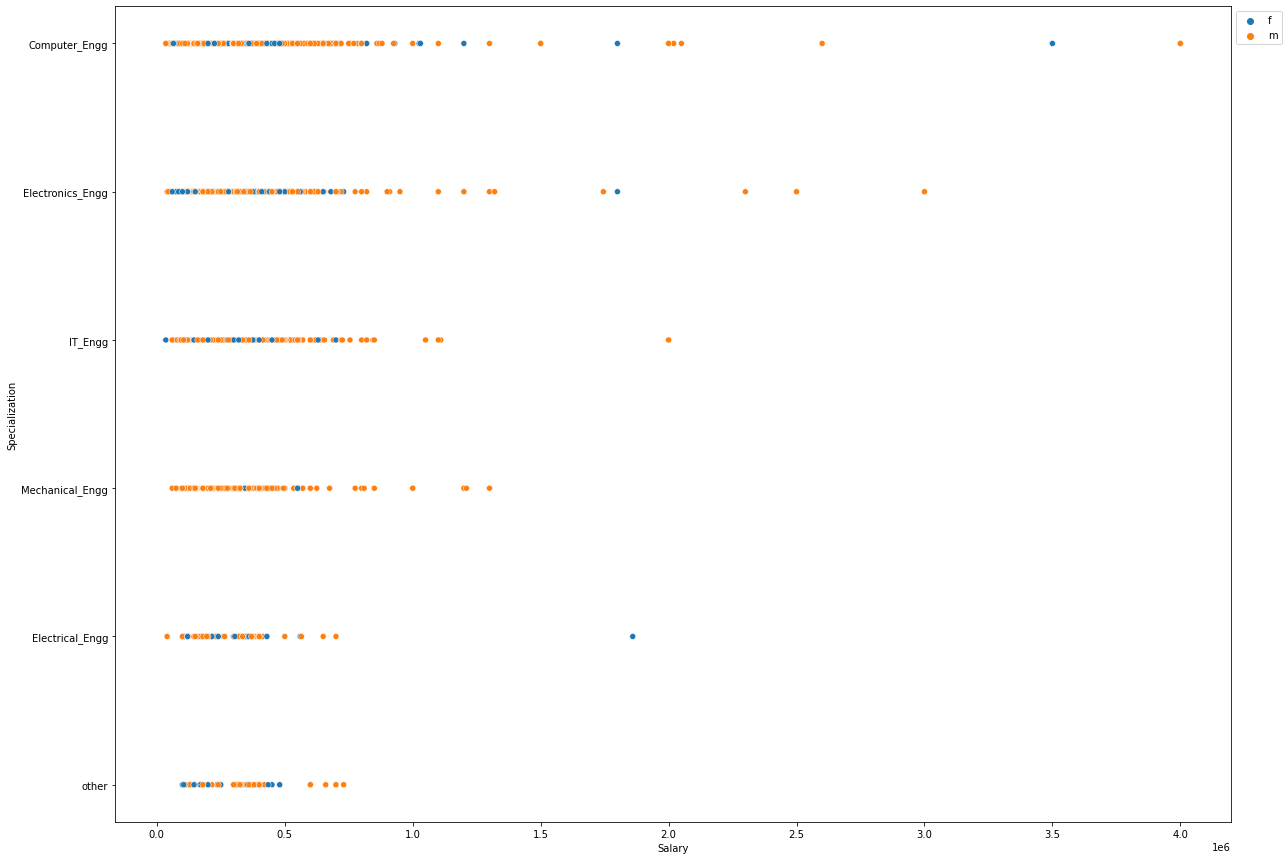

In [90]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
  
sns.scatterplot( x="Salary", y='Specialization', data=df,
                hue='Gender')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

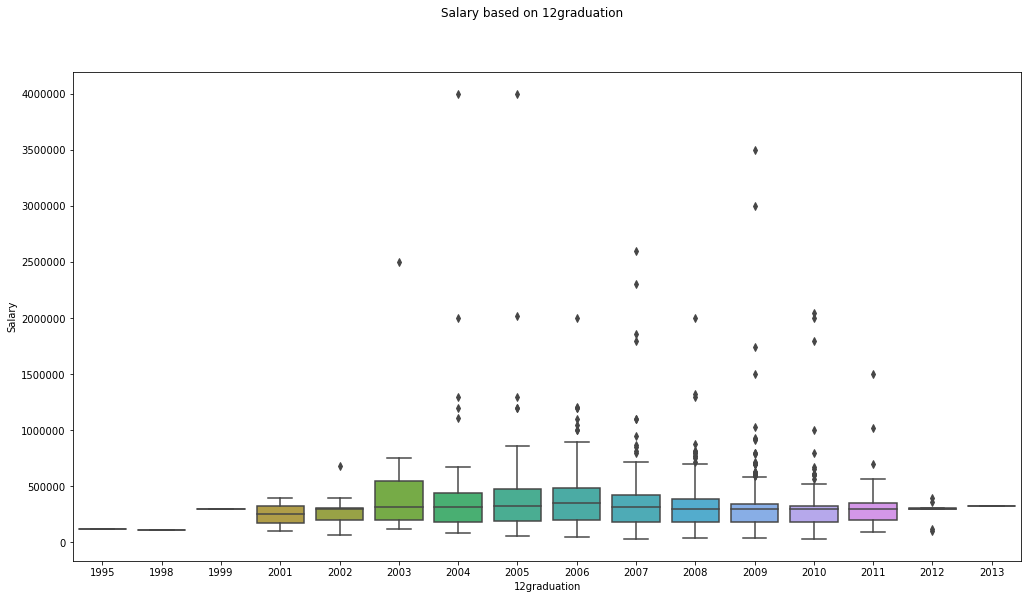

In [91]:
# Salary based on 12graduation
plt.figure(figsize=(17,9))
sns.boxplot(y='Salary',x='12graduation',data=df)
plt.ticklabel_format(style='plain',axis='y')
plt.suptitle('Salary based on 12graduation')
plt.show()

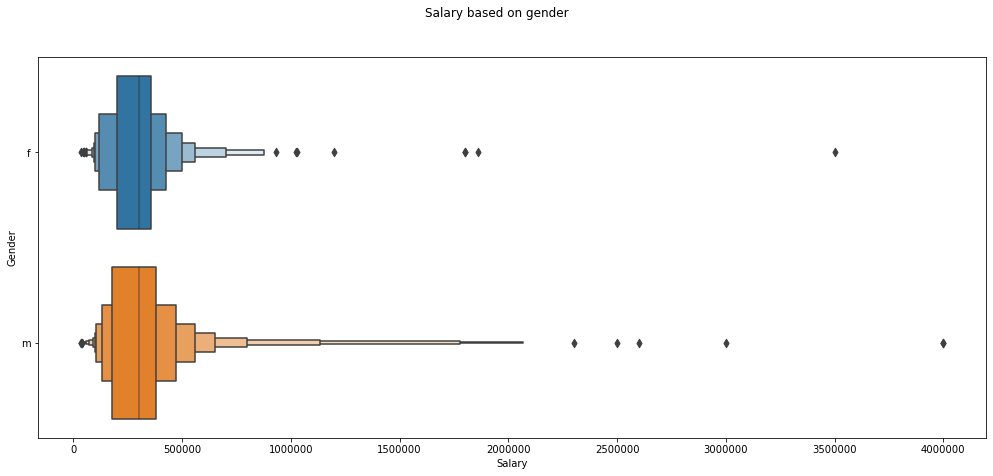

In [92]:
# Salary based on gender
plt.figure(figsize=(17,7))
sns.boxenplot(x = df['Salary'], y = df['Gender'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary based on gender')
plt.show()

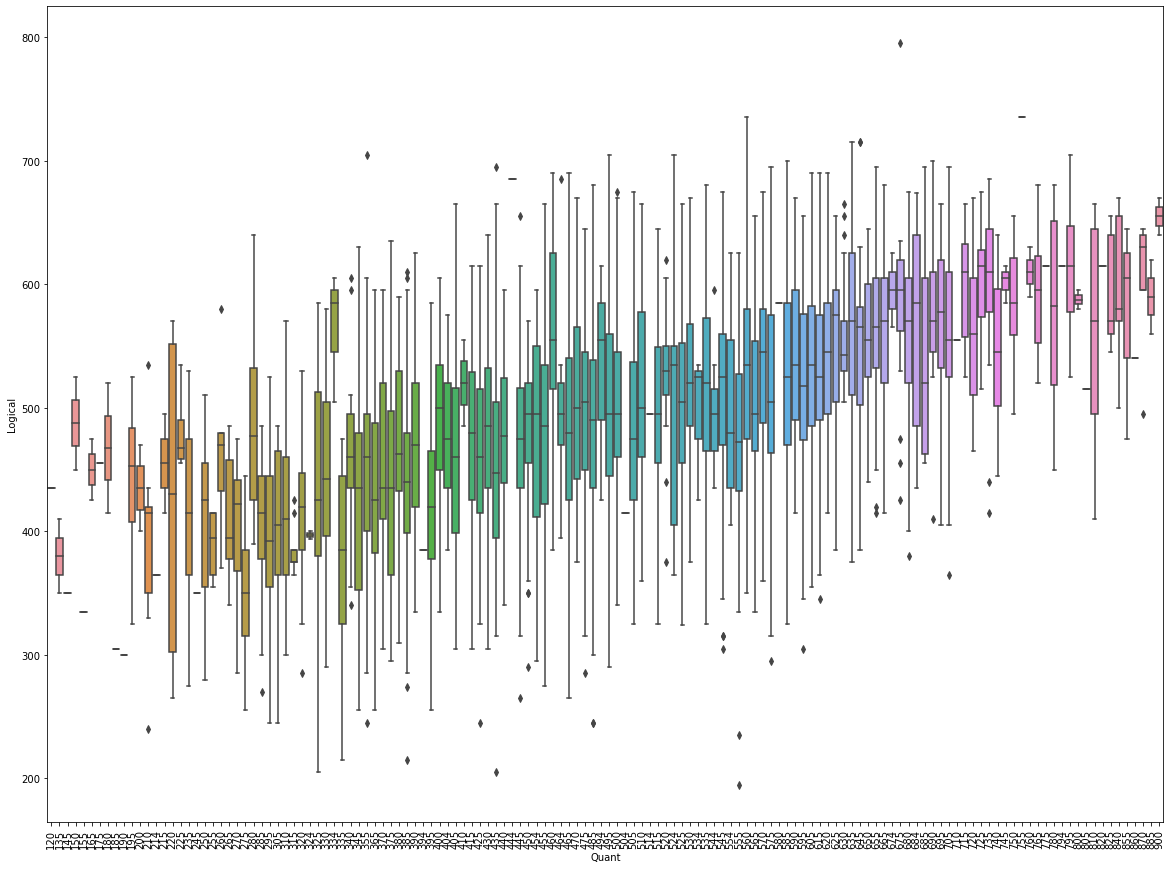

In [93]:
# Quant vs. Logical
plt.figure(figsize=(20,15))
sns.boxplot(x = df['Quant'], y = df['Logical'])
plt.xticks(rotation='90')
plt.show()

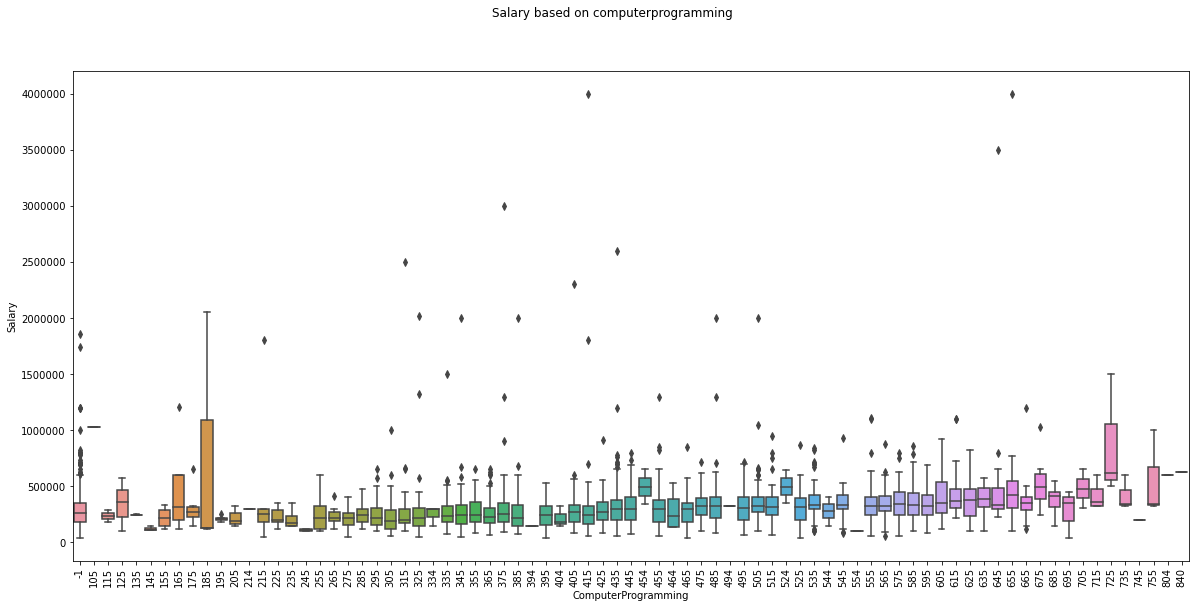

In [94]:
# Salary based on computerprogramming
plt.figure(figsize=(20,9))
sns.boxplot(y='Salary',x='ComputerProgramming',data=df)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation='90')
plt.suptitle('Salary based on computerprogramming')
plt.show()

In [95]:
# Checking Correlation
df.corr()

ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.247294      0.044547      0.673102   
Salary                -0.247294  1.000000      0.177373     -0.161383   
10percentage           0.044547  0.177373      1.000000      0.269957   
12graduation           0.673102 -0.161383      0.269957      1.000000   
12percentage           0.007069  0.170254      0.643378      0.259166   
CollegeID              0.284540 -0.118690      0.021082      0.254021   
CollegeTier            0.035160 -0.179332     -0.126042      0.027691   
collegeGPA             0.047144  0.130103      0.312538      0.086001   
CollegeCityID          0.284540 -0.118690      0.021082      0.254021   
CollegeCityTier       -0.035977  0.015384      0.116707     -0.003016   
GraduationYear         0.027539 -0.010053     -0.013799      0.014457   
English                0.135505  0.178219      0.350780      0.147925   
Logical                0.102215  0.179275      0.316014      0.105887   
Quant                 -0.055134  0.230627      0.317640      0.001379   
Domain                -0.125639  0.104656      0.078563     -0.034163   
ComputerProgramming    0.018859  0.115665      0.053600     -0.047995   
ElectronicsAndSemicon -0.115601  0.000665      0.085179     -0.005891   
ComputerScience        0.482626 -0.100720     -0.018933      0.293439   
MechanicalEngg        -0.026147  0.018475      0.050364      0.035459   
ElectricalEngg         0.104454 -0.047598      0.074419      0.123751   
TelecomEngg           -0.049272 -0.022691      0.049378      0.023470   
CivilEngg             -0.017871  0.037639      0.030002     -0.004727   
conscientiousness      0.175557 -0.064148      0.067657      0.103329   
agreeableness          0.024837  0.057423      0.136645      0.041182   
extraversion           0.120979 -0.010213     -0.004679      0.061956   
nueroticism           -0.146289 -0.054685     -0.132496     -0.074369   
openess_to_experience  0.031359 -0.011312      0.036692     -0.015069   

                       12percentage  CollegeID  CollegeTier  collegeGPA  \
ID                         0.007069   0.284540     0.035160    0.047144   
Salary                     0.170254  -0.118690    -0.179332    0.130103   
10percentage               0.643378   0.021082    -0.126042    0.312538   
12graduation               0.259166   0.254021     0.027691    0.086001   
12percentage               1.000000   0.022336    -0.100771    0.346137   
CollegeID                  0.022336   1.000000     0.067054    0.017240   
CollegeTier               -0.100771   0.067054     1.000000   -0.086781   
collegeGPA                 0.346137   0.017240    -0.086781    1.000000   
CollegeCityID              0.022336   1.000000     0.067054    0.017240   
CollegeCityTier            0.130462   0.007757    -0.101494    0.017471   
GraduationYear            -0.012933  -0.000172    -0.005557    0.008706   
English                    0.212888  -0.022792    -0.183843    0.106478   
Logical                    0.243571  -0.047094    -0.182811    0.196610   
Quant                      0.312413  -0.114672    -0.251103    0.217380   
Domain                     0.074099  -0.073857    -0.061436    0.107252   
ComputerProgramming        0.080818  -0.033760    -0.073644    0.136596   
ElectronicsAndSemicon      0.117112  -0.020438    -0.031573    0.029855   
ComputerScience           -0.043534   0.102303     0.001053    0.007601   
MechanicalEngg             0.037635  -0.009291    -0.021548   -0.031765   
ElectricalEngg             0.064001   0.022933     0.002594    0.052258   
TelecomEngg                0.044201   0.025620     0.000007   -0.005226   
CivilEngg                  0.005910   0.005749    -0.033722   -0.018950   
conscientiousness          0.058299   0.076432     0.055174    0.069582   
agreeableness              0.103998  -0.005264    -0.038055    0.068282   
extraversion              -0.007486   0.005917     0.009970   -0.032684   
nueroticism               -0.09436

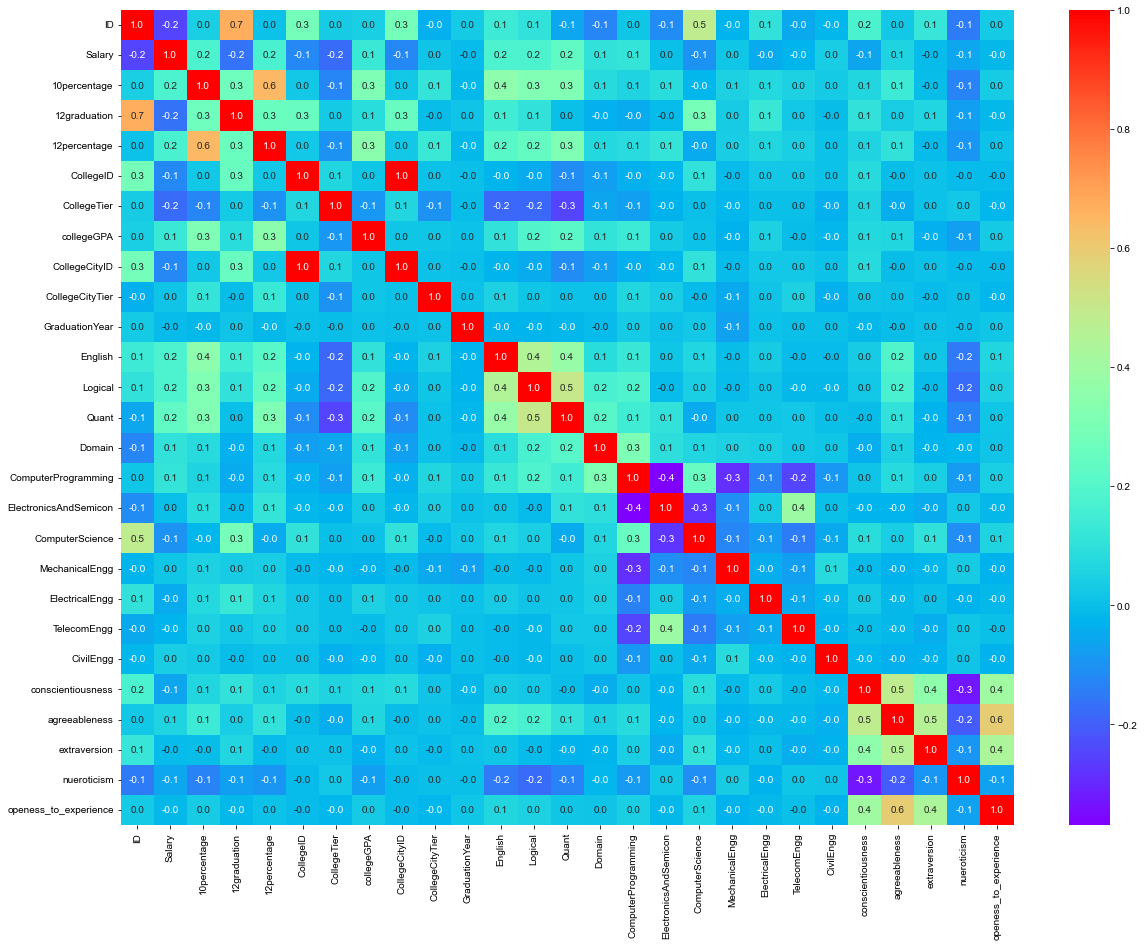

In [96]:
corr = df.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt= '.1f',ax=ax, cmap="rainbow")
sns.set(font_scale=1.25)
plt.show()

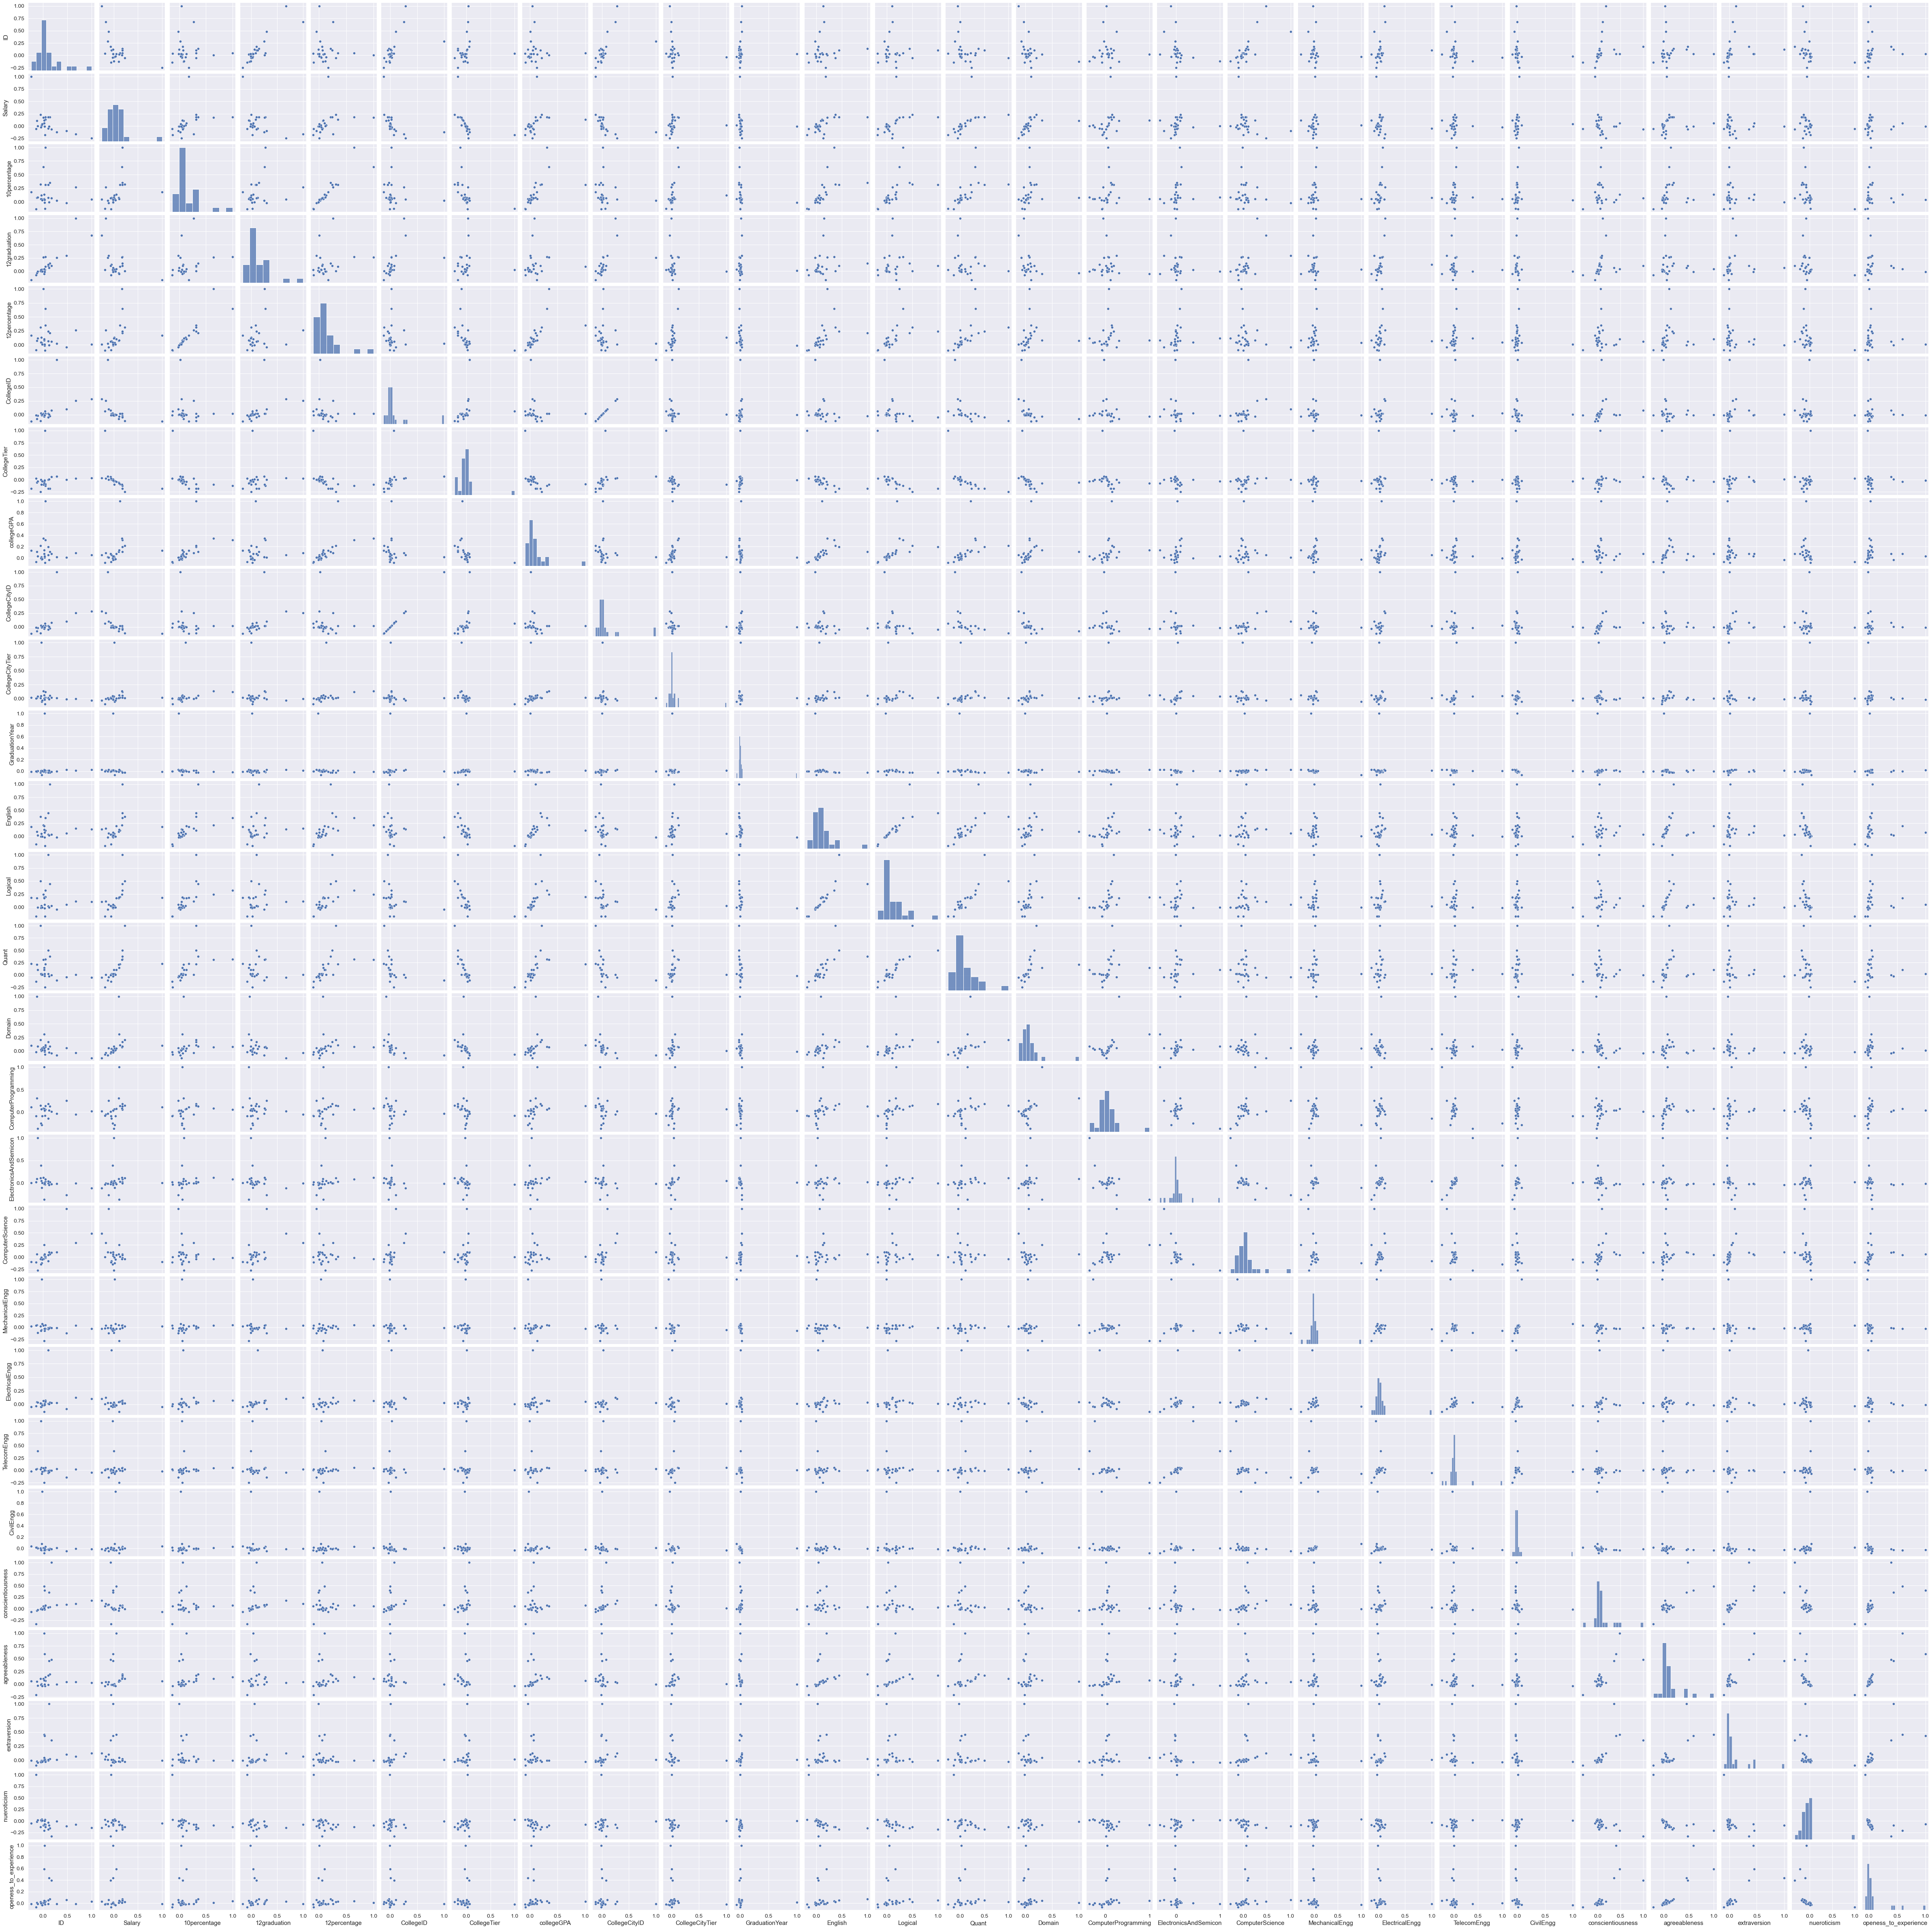

In [97]:
# Pairplot
sns.pairplot(df.corr())

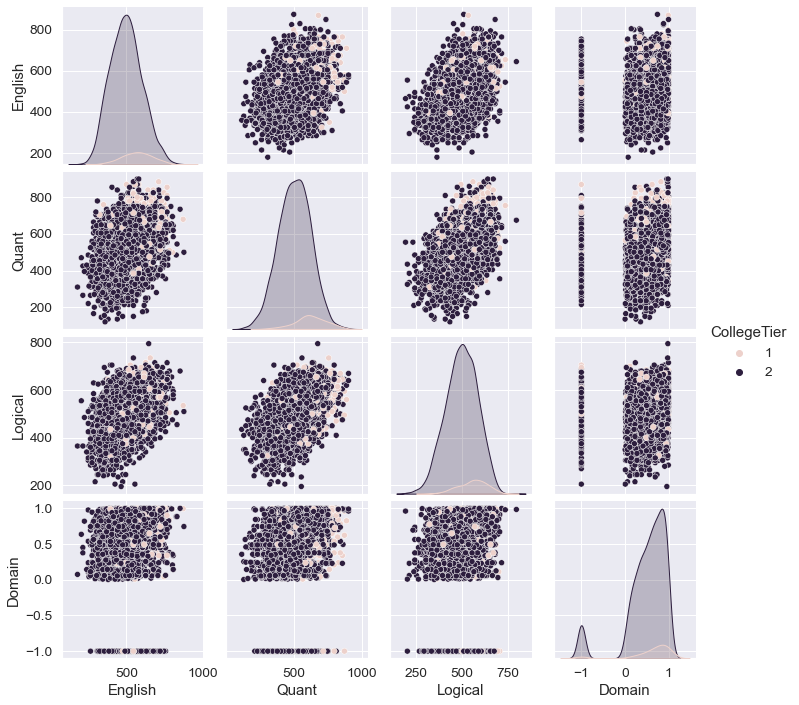

In [99]:
# PairPlot
# Scores By College Tier
scores= df[['English','Quant','Logical','Domain','CollegeTier']]
sns.pairplot(data=scores,hue='CollegeTier')

# <center>THANK YOU</center>